#Packages

In [ ]:
install.packages(c("forecast", "aTSA", "Metrics", "datasets", "ISLR", "dplyr")) #, "prophet"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
devtools::install_github ("bdemeshev/sophisthse")

rlang      (1.1.3 -> 1.1.4      ) [CRAN]
tidyselect (1.2.0 -> 1.2.1      ) [CRAN]
BH         (NA    -> 1.84.0-0   ) [CRAN]
stringi    (1.8.3 -> 1.8.4      ) [CRAN]
anytime    (NA    -> 0.3.9      ) [CRAN]
bitops     (NA    -> 1.0-7      ) [CRAN]
tsibble    (NA    -> 1.1.4      ) [CRAN]
RCurl      (NA    -> 1.98-1.14  ) [CRAN]
XML        (NA    -> 3.99-0.16.1) [CRAN]


Installing 9 packages: rlang, tidyselect, BH, stringi, anytime, bitops, tsibble, RCurl, XML

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpcgkUcB/remotes876c1aeda4/bdemeshev-sophisthse-4c75680/DESCRIPTION’ ... OK
* preparing ‘sophisthse’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sophisthse_0.8.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(ISLR)
library(aTSA)
library(datasets)
library(Metrics)
library(tseries)
#library(prophet)
library(ggplot2)
library(dplyr)
library(zoo)
library(dplyr)
library(sophisthse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




#Helper functions

In [ ]:
# Создаст все возможные наборы ARIMA с различными значениями лагов, дифференциированний и moving average
# Вернет датафрейм с оценками
createArimas <- function(learn, test, max_p, max_d, max_q){
  counter = 0
  qq <- c()
  pp <- c()
  dd <- c()
  RMSE <- c()
  MAE <- c()
  MAPE <- c()
  AIC_c <- c()
  for(d in 0:max_d){
    for (p in 0:max_p)
    {
      for (q in 0:max_q)
      {
        res <- tryCatch(
          {
            model = Arima(learn, order = c(p,d,q))
            pred = c(predict(model, n.ahead = 365)$pred) # pred = predict(model, n.ahead = 12)
            AIC_c = append(AIC_c, AIC(model))
            RMSE = append(RMSE, rmse(test, pred)) #pred$pred
            MAE = append(MAE, mae(test, pred)) #
            MAPE = append(MAPE, mape(test, pred))#
            pp = append(pp, p)
            qq = append(qq, q)
            dd = append(dd, d)
            counter = counter + 1
          },
          error = function(cond)
          {return(NA)})
      }
    }
  }
  DF_RMSE_MAE = data.frame(p = pp, d=dd, q = qq, RMSE, MAE, MAPE, AIC=AIC_c)
  return(DF_RMSE_MAE)
}

In [ ]:
train_prophet_model <- function(df, params) {
  m <- prophet(df, changepoint.prior.scale = params$changepoint_prior_scale,
                   seasonality.prior.scale = params$seasonality_prior_scale,
                   n.changepoints = params$n_changepoints,
                   seasonality.mode = params$seasonality_mode)
  return(m)
}

In [ ]:
calculate_metrics <- function(model, data) {
  forecast <- predict(model, data)
  actual <- data$y
  residuals <- actual - forecast$yhat
  RMSE <- rmse(data$y, forecast$yhat)
  MAE <- mae(data$y, forecast$yhat)
  MAPE <- mape(data$y, forecast$yhat)

  metrics <- list(RMSE = RMSE, MAE = MAE, MAPE = MAPE)
  return(metrics)
}

In [ ]:
calculate_metrics <- function(model, data) {
  future <- make_future_dataframe(model, periods = length(data$ds), freq = 'month')
  forecast <- predict(model, future)
  actual <- data$y
  residuals <- actual - forecast$yhat
  RMSE <- rmse(test_df$y, forecast$yhat)
  MAE <- mae(test_df$y, forecast$yhat)
  MAPE <- mape(data$y, forecast$yhat)

  metrics <- list(RMSE = RMSE, MAE = MAE, MAPE = MAPE)
  return(metrics)
}

In [ ]:
future <- make_future_dataframe(base_prophet, periods = length(test_df$ds), freq = 'month')
forecast_base <- predict(base_prophet, future)

#Индекс потребительских цен

##Временной ряд

In [ ]:
cpi <- sophisthse("CPI_M_CHI")

Warning message in grepl("\\\\u[0-9A-Fa-f]", str):
“unable to translate '<HTML>
<HEAD>
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv=Content-Type content="text/html; charset=windows-1251">
<META http-equiv=pragma content=no-cache>
<META http-...' to a wide string”
Warning message in grepl("\\\\u[0-9A-Fa-f]", str):
“input string 1 is invalid”
Warning message in grepl("\\\\u[0-9A-Fa-f]", str):
“unable to translate '<HTML>
<HEAD>
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv=Content-Type content="text/html; charset=windows-1251">
<META http-equiv=pragma content=no-cache>
<META http-...' to a wide string”
Warning message in grepl("\\\\u[0-9A-Fa-f]", str):
“input string 1 is invalid”
Warning message in grepl("\\\\u[0-9A-Fa-f]", str):
“unable to translate '<HTML>
<HEAD>
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv="

In [ ]:
cpi_new <- window(cpi, start = c(1993, 1), end = c(2023, 12)) #уберем аномальное значение
cpi_new

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1993,126.0,125.0,120.0,119.0,118.0,120.0,122.0,126.0,123.0,120.0,116.0,113.0
1994,118.0,111.0,107.0,108.0,107.0,106.0,105.0,105.0,108.0,115.0,115.0,116.0
1995,118.0,111.0,109.0,108.5,107.9,106.7,105.4,104.6,104.5,104.7,104.6,103.2
1996,104.1,102.8,102.8,102.2,101.6,101.2,100.7,99.8,100.3,101.2,101.9,101.4
1997,102.3,101.5,101.4,101.0,100.9,101.1,100.9,99.9,99.7,100.2,100.6,101.0
1998,101.5,100.9,100.6,100.4,100.5,100.1,100.2,103.7,138.4,104.5,105.7,111.6
1999,108.4,104.1,102.8,103.0,102.2,101.9,102.8,101.2,101.5,101.4,101.2,101.3
2000,102.3,101.0,100.6,100.9,101.8,102.6,101.8,101.0,101.3,102.1,101.5,101.6
2001,102.8,102.3,101.9,101.8,101.8,101.6,100.5,100.0,100.6,101.1,101.4,101.6
2002,103.1,101.2,101.1,101.2,101.7,100.5,100.7,100.1,100.4,101.1,101.6,101.5


Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


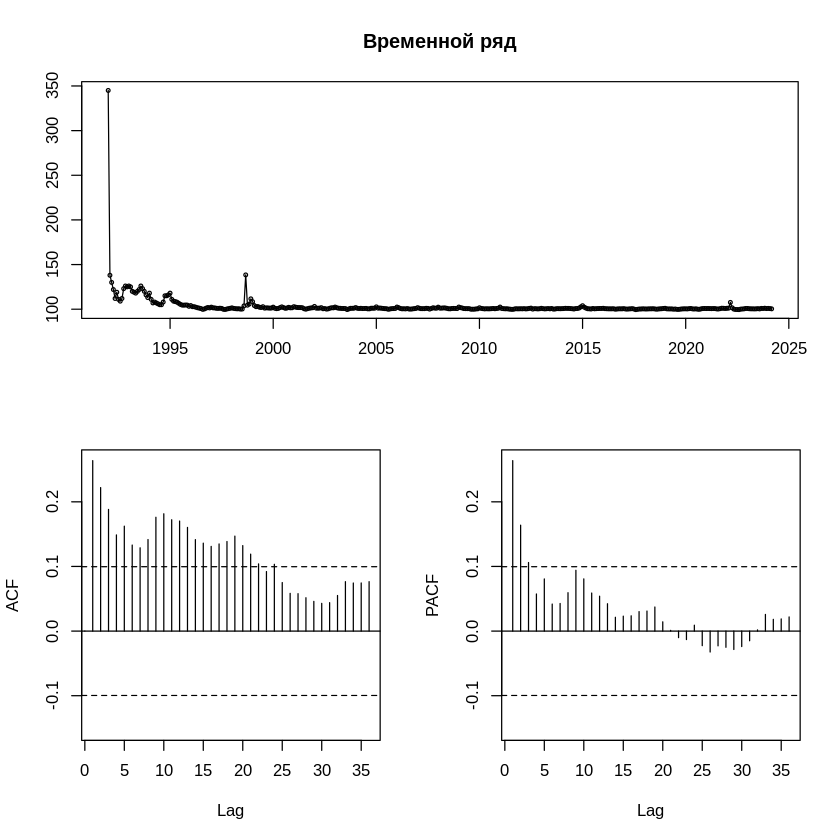

In [ ]:
tsdisplay(cpi, main = 'Временной ряд', ci.col = "black")

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


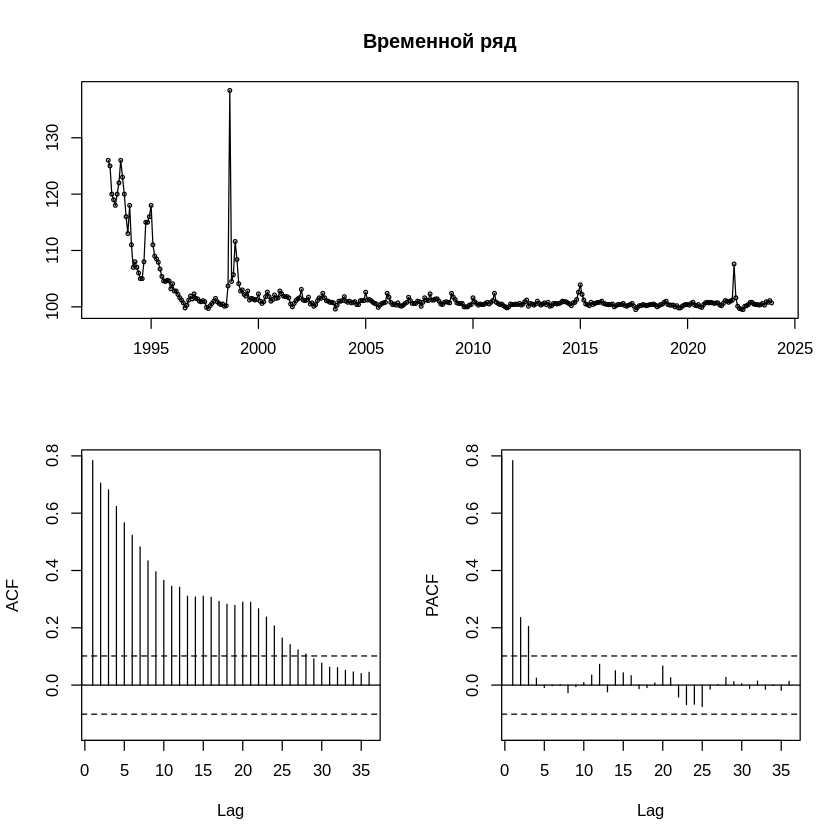

In [ ]:
tsdisplay(cpi_new, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(cpi_new)


	Augmented Dickey-Fuller Test

data:  cpi_new
Dickey-Fuller = -2.8182, Lag order = 7, p-value = 0.2317
alternative hypothesis: stationary


`p-value` > 0.05, не можем отвергнуть нулевую гипотезу - процесс нестанионарный.

In [ ]:
cpi_diff <- diff(cpi_new)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


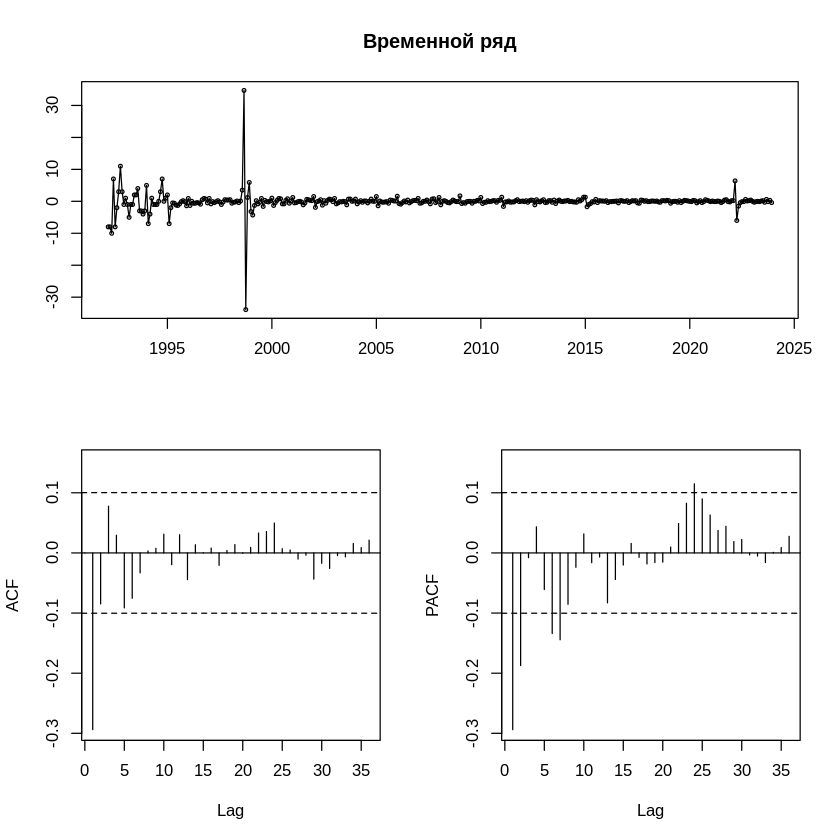

In [ ]:
tsdisplay(diff(cpi_new), main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(cpi_diff)

Warning message in adf.test(cpi_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  cpi_diff
Dickey-Fuller = -11.008, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


`p-value` < 0.05

ACF резко обрывается на втором лаге, поэтому q=1. PACF резко обрывается на втором лаге, поэтому p=2.
d=1

In [ ]:
cpi_test = tail(cpi_diff, 12)
cpi_learn = head(cpi_diff, -12)

ERROR: Error in eval(expr, envir, enclos): object 'cpi_diff' not found


In [ ]:
cpi_test = tail(cpi_new, 12)
cpi_learn = head(cpi_new, -12)

In [ ]:
cpi_learn

In [ ]:
cpi_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.8,100.5,100.4,100.4,100.3,100.4,100.6,100.3,100.9,100.8,101.1,100.7


##ARIMA.auto

In [ ]:
model = auto.arima(cpi_learn, trace= TRUE, stationary = FALSE, approximation = FALSE, seasonal= TRUE)
summary(model)


 ARIMA(2,1,2)(1,0,1)[12] with drift         : Inf
 ARIMA(0,1,0)            with drift         : 1773.805
 ARIMA(1,1,0)(1,0,0)[12] with drift         : 1723.934
 ARIMA(0,1,1)(0,0,1)[12] with drift         : 1691.28
 ARIMA(0,1,0)                               : 1772.001
 ARIMA(0,1,1)            with drift         : 1689.614
 ARIMA(0,1,1)(1,0,0)[12] with drift         : 1691.25
 ARIMA(0,1,1)(1,0,1)[12] with drift         : Inf
 ARIMA(1,1,1)            with drift         : 1689.702
 ARIMA(0,1,2)            with drift         : 1689.479
 ARIMA(0,1,2)(1,0,0)[12] with drift         : 1691.132
 ARIMA(0,1,2)(0,0,1)[12] with drift         : 1691.164
 ARIMA(0,1,2)(1,0,1)[12] with drift         : Inf
 ARIMA(1,1,2)            with drift         : 1690.448
 ARIMA(0,1,3)            with drift         : 1691.112
 ARIMA(1,1,3)            with drift         : 1692.467
 ARIMA(0,1,2)                               : 1688.925
 ARIMA(0,1,2)(1,0,0)[12]                    : 1690.505
 ARIMA(0,1,2)(0,0,1)[12]  

Series: cpi_learn 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.5535
s.e.   0.0490

sigma^2 = 6.403:  log likelihood = -842.38
AIC=1688.76   AICc=1688.8   BIC=1696.53

Training set error measures:
                     ME    RMSE       MAE        MPE      MAPE      MASE
Training set -0.1550152 2.52346 0.9149413 -0.1739779 0.8417548 0.5971485
                   ACF1
Training set 0.03085484

In [ ]:
preds = predict(model, n.ahead = length(cpi_test))

In [ ]:
pred_auto<-round(preds$pred,1)
pred_auto

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5,100.5


In [ ]:
cpi_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.8,100.5,100.4,100.4,100.3,100.4,100.6,100.3,100.9,100.8,101.1,100.7


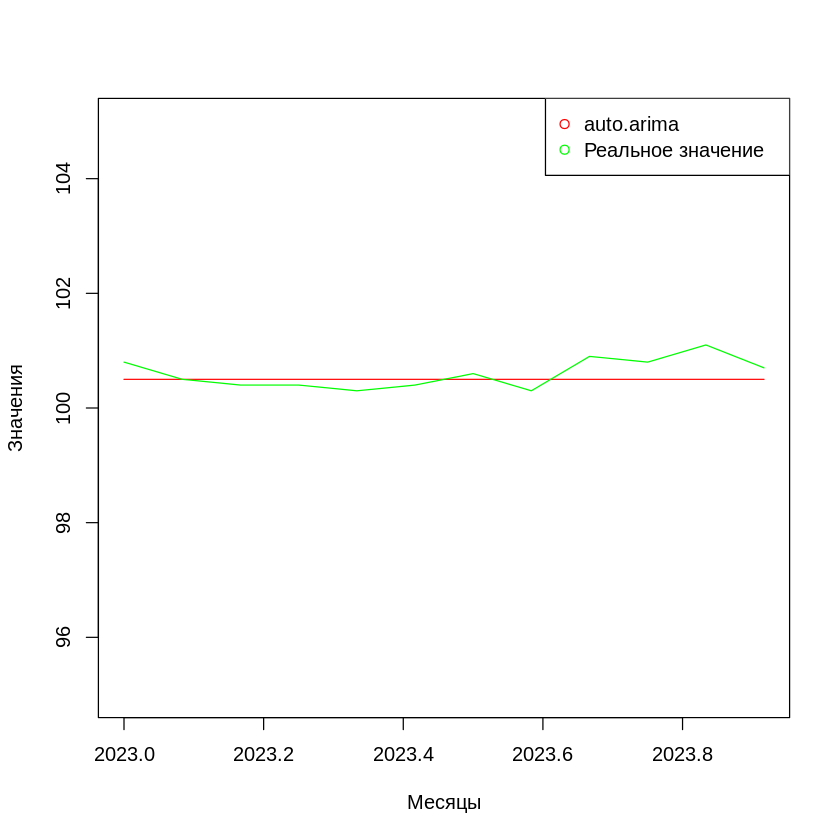

In [ ]:
plot(pred_auto, col = "red", ylim = c(95, 105),
     xlab = "Месяцы", ylab = "Значения")
lines(cpi_test, col = "green")
legend("topright", legend = c("auto.arima", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
RMSE = c(rmse(cpi_test, pred_auto))
MAE = c(mae(cpi_test, pred_auto))
print(c(RMSE,MAE))

[1] 0.2677063 0.2166667


##Подбор по RMSE/MAE/AIC

In [ ]:
arimas <- createArimas(cpi_learn, cpi_test, 2, 1, 1)
bestModels <- rbind(
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,MAPE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
11,2,1,0,0.2522085,0.2189229,0.002174967,1690.410
10,1,1,1,0.2752934,0.2171122,0.002154577,1689.116


ARIMA(2, 1, 0) - наилучшая по RMSE

ARIMA(1, 1, 1)

ARIMA(0, 1, 1) - модель, которую выдала auto.arima (AIC - 1688.76)

In [ ]:
arima210 = arima(cpi_learn, c(2,1,0))

In [ ]:
preds <- predict(arima210, n.ahead=length(cpi_test))
pred_arima210 <- round(preds$pred,1)
pred_arima210

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.5,100.6,100.6,100.6,100.6,100.6,100.6,100.6,100.6,100.6,100.6,100.6


In [ ]:
cpi_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.8,100.5,100.4,100.4,100.3,100.4,100.6,100.3,100.9,100.8,101.1,100.7


In [ ]:
MAPE = c(mape(cpi_test, pred_auto))
print(MAPE)

[1] 0.002150636


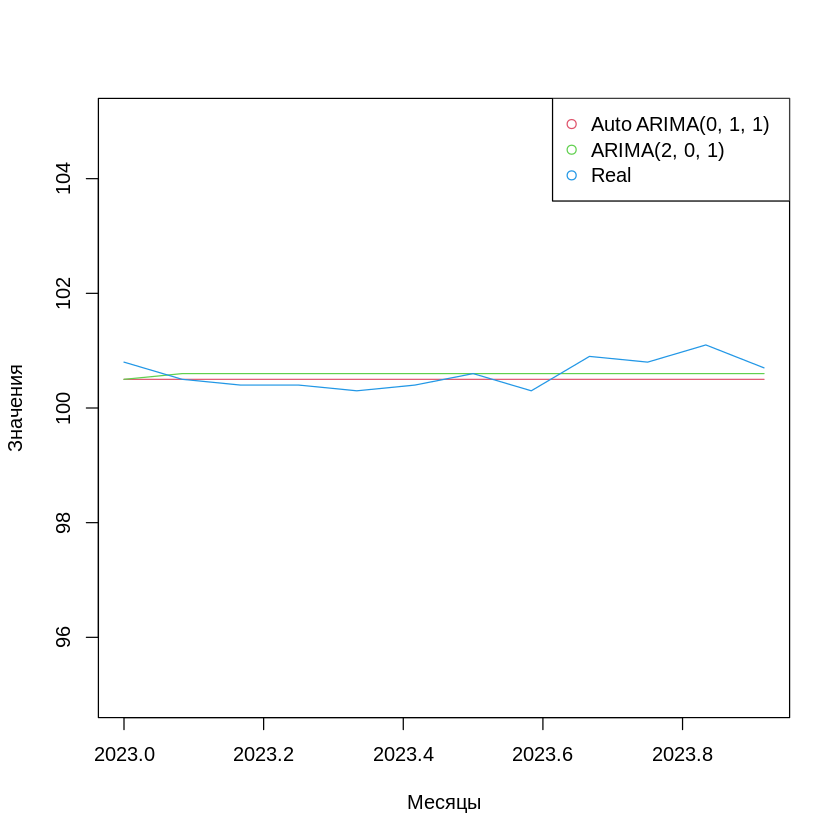

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(95, 105),
     xlab = "Месяцы",
     ylab = "Значения")
lines(pred_arima210,
      type = "l",
      col = 3)
lines(cpi_test,
      type = "l",
      col = 4)
legend("topright", legend = c("Auto ARIMA(0, 1, 1)", "ARIMA(2, 0, 1)","Real"), col=c(2, 3, 4), pch=1)

Вывод: ARIMA(2, 1, 0) лучше, чем ARIMA(0, 1, 1)

##Prophet

Предобработка данных

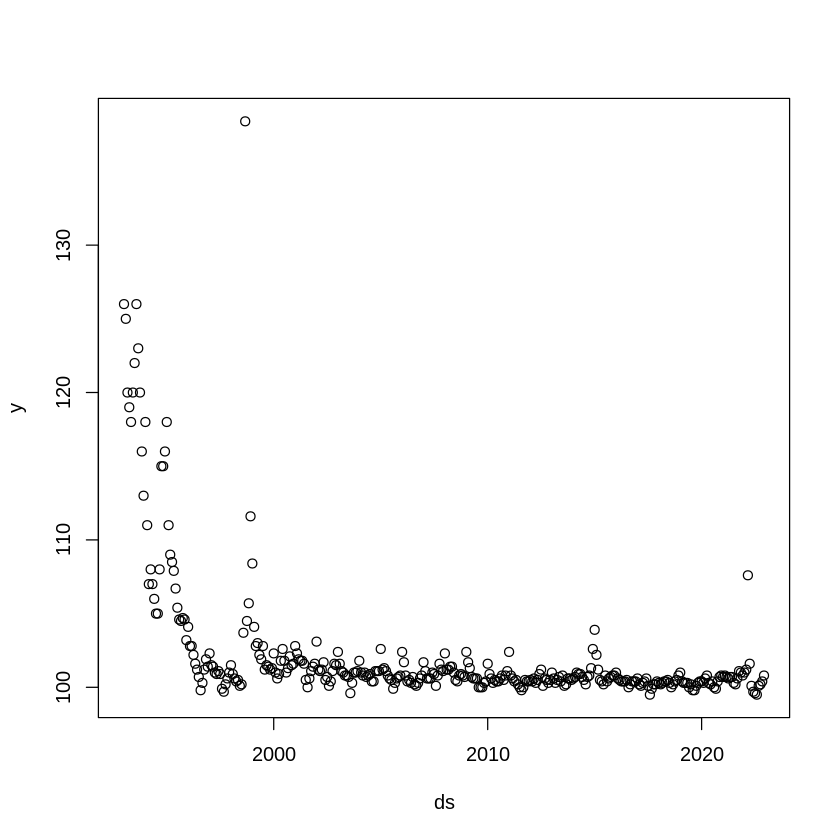

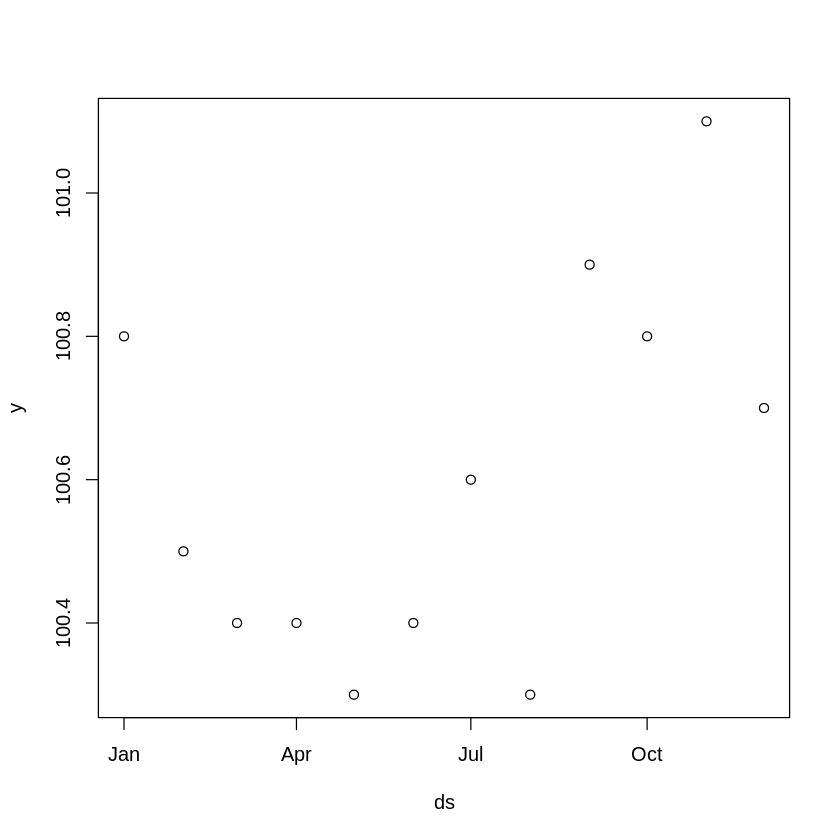

In [ ]:
ts_data <- ts(cpi_new, start = c(1993, 1), end = c(2023, 12), frequency = 12)

train_data <- window(ts_data, start = c(1993, 1), end = c(2022, 12))
test_data <- window(ts_data, start = c(2023, 1), end = c(2023, 12))

df <- data.frame(ds = as.Date(time(ts_data), format = "%Y-%m-%d"),
                 y = as.numeric(ts_data))

train_df <- data.frame(ds = as.Date(time(train_data), format = "%Y-%m-%d"),
                 y = as.numeric(train_data))
test_df <- data.frame(ds = as.Date(time(test_data), format = "%Y-%m-%d"),
                 y = as.numeric(test_data))

plot(train_df)
plot(test_df)

In [ ]:
test_df

ds,y
<date>,<dbl>
2023-01-01,100.8
2023-02-01,100.5
2023-03-01,100.4
2023-04-01,100.4
2023-05-01,100.3
2023-06-01,100.4
2023-07-01,100.6
2023-08-01,100.3
2023-09-01,100.9


In [ ]:
cpi_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.8,100.5,100.4,100.4,100.3,100.4,100.6,100.3,100.9,100.8,101.1,100.7


###Base

In [ ]:
require(prophet)
base_prophet <- prophet(df=train_df)

future <- make_future_dataframe(base_prophet, periods = length(test_df$ds), freq = 'month')
forecast_base <- predict(base_prophet, future)

Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [ ]:
str(base_prophet)

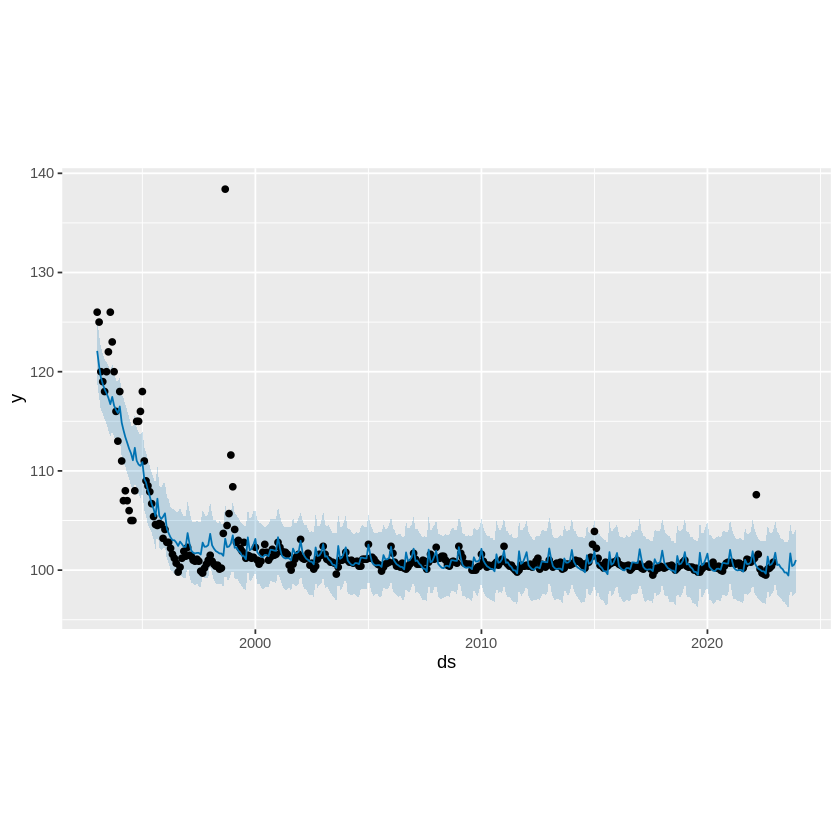

In [ ]:
plot(base_prophet, forecast_base)

In [ ]:
forecast_df <- data.frame(ds = as.Date(forecast_base$ds), yhat = forecast_base$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
head(forecast_df)

,ds,yhat
,<date>,<dbl>
361,2023-01-01,101.75046
362,2023-02-01,100.50988
363,2023-03-01,100.57170
364,2023-04-01,100.25121
365,2023-05-01,100.09345
366,2023-06-01,99.76371


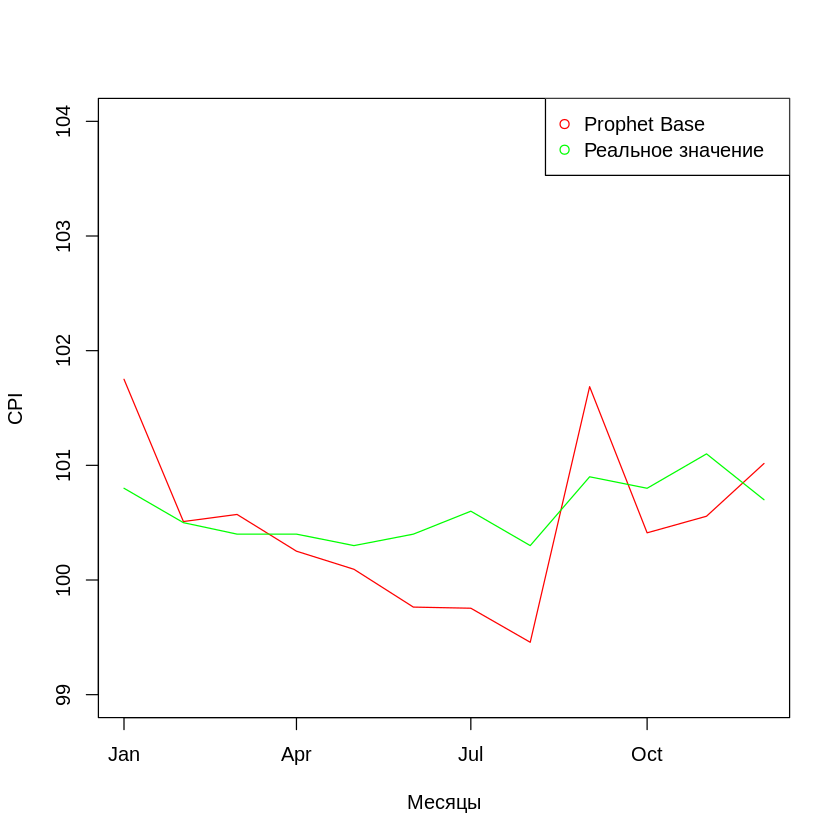

In [ ]:
plot(forecast_df, type="l", col = "red", ylim = c(99, 104),
     xlab = "Месяцы", ylab = "CPI")
lines(test_df, col = "green")
legend("topright", legend = c("Prophet Base", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
RMSE = c(rmse(test_df$y, forecast_df$yhat))
MAE = c(mae(test_df$y, forecast_df$yhat))
print(c(RMSE,MAE))

[1] 0.5768944 0.4872671


###GridSearch

In [ ]:
param_grid <- expand.grid(changepoint_prior_scale = c(0.0005, 0.001, 0.01, 0.05),
                          seasonality_prior_scale = c(0.005, 0.01, 0.1, 1.0),
                          n_changepoints = c(1, 3, 5, 7, 10),
                          seasonality_mode = c('multiplicative','additive'))

results <- list()
model_parameters <- data.frame(RMSE = numeric(), MAE = numeric(),
                              changepoint_prior_scale = numeric(),
                              seasonality_prior_scale = numeric())

for (i in 1:nrow(param_grid)) {
  params <- param_grid[i, ]
  model <- train_prophet_model(train_df, params)
  metrics <- calculate_metrics(model, test_df)

  new_row <- data.frame(RMSE = metrics$RMSE, MAE = metrics$MAE,
                        changepoint_prior_scale = params$changepoint_prior_scale,
                        seasonality_prior_scale = params$seasonality_prior_scale,
                        n_changepoints = params$n_changepoints,
                        seasonality_mode = params$seasonality_mode)
  model_parameters <- rbind(model_parameters, new_row)

  results[[i]] <- list(params = params, model = model, metrics = metrics)
}
best_model <- results[[which.min(sapply(results, function(x) x$metrics$RMSE))]]

In [ ]:
best_model$metrics

$RMSE
[1] 0.4174955

$MAE
[1] 0.3429176

5e-02	0.005	10	additive

In [ ]:
model_parameters

RMSE,MAE,changepoint_prior_scale,seasonality_prior_scale,n_changepoints,seasonality_mode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2.6015603,2.5522713,5e-04,0.005,1,multiplicative
2.6014668,2.5521810,1e-03,0.005,1,multiplicative
1.9753391,1.9158869,1e-02,0.005,1,multiplicative
0.8808747,0.7849542,5e-02,0.005,1,multiplicative
2.6074916,2.5493223,5e-04,0.010,1,multiplicative
2.6074257,2.5492568,1e-03,0.010,1,multiplicative
1.9742074,1.9030576,1e-02,0.010,1,multiplicative
0.9035768,0.7843882,5e-02,0.010,1,multiplicative
2.5674973,2.4867609,5e-04,0.100,1,multiplicative


In [ ]:
str(best_model$model)

In [ ]:
future <- make_future_dataframe(best_model$model, periods = length(test_df$ds), freq = 'month')
forecast_gridsearch <- predict(best_model$model, future)

In [ ]:
forecast_df <- data.frame(ds = as.Date(forecast_gridsearch$ds), yhat = forecast_gridsearch$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
head(forecast_df)

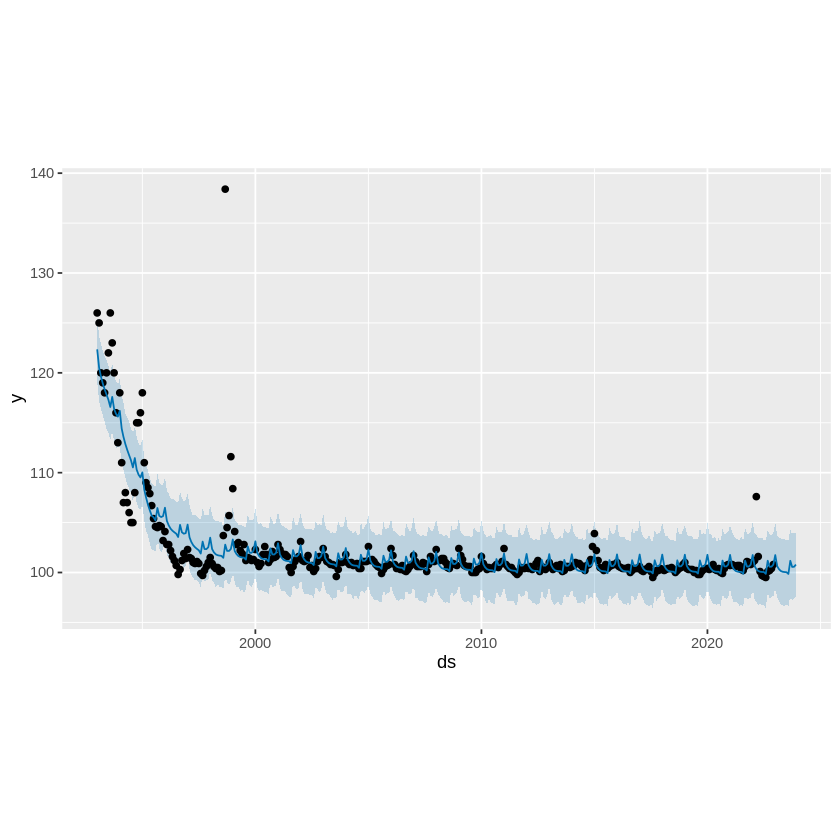

In [ ]:
plot(best_model$model, forecast_gridsearch)

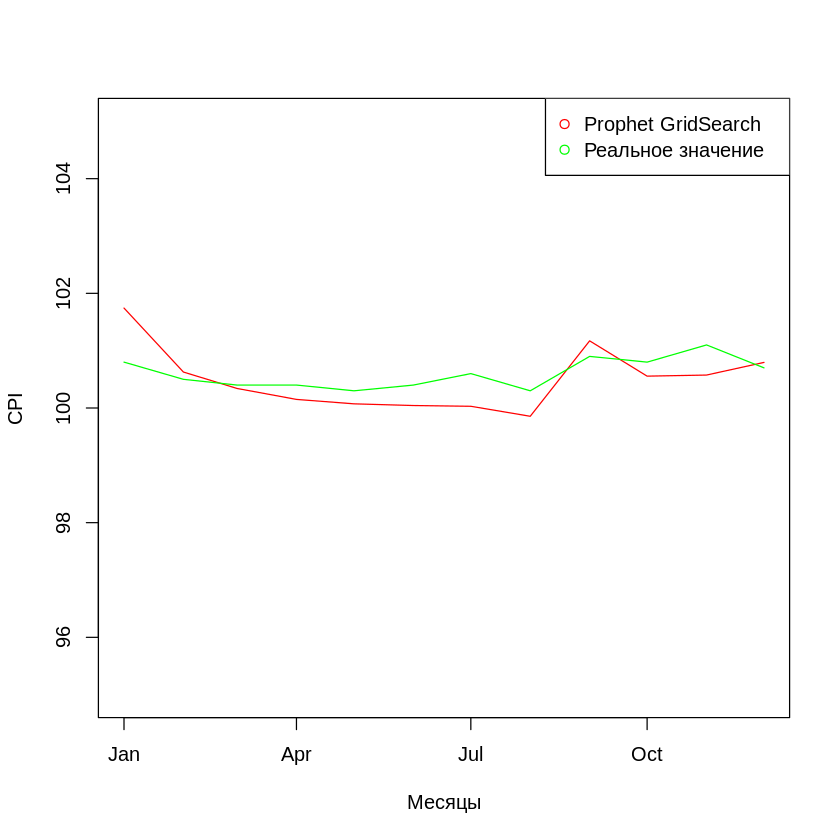

In [ ]:
plot(forecast_df, type="l", col = "red", ylim = c(95, 105),
     xlab = "Месяцы", ylab = "CPI")
lines(test_df, col = "green")
legend("topright", legend = c("Prophet GridSearch", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
pred_prophet <- ts(forecast_df$yhat, frequency = 12, start = c(2023, 1))
pred_prophet

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,101.74300,100.62722,100.34065,100.14985,100.07266,100.04320,100.02981,99.85553,101.17119,100.55564,100.57458,100.79553


In [ ]:
cpi_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,100.8,100.5,100.4,100.4,100.3,100.4,100.6,100.3,100.9,100.8,101.1,100.7


##best_model from python

In [ ]:
# Best parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.001, 'n_changepoints': 10, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.001}
# Best RMSE: 0.20468038689818985

In [ ]:
m <- prophet(train_df, changepoint.prior.scale = 0.1,
                   seasonality.prior.scale = 0.001,
                   n.changepoints = 10,
                   seasonality.mode = 'multiplicative',
                   holidays.prior.scale = 0.001)

Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [ ]:
future <- make_future_dataframe(m, periods = length(test_df$ds), freq = 'month')
forecast <- predict(m, future)
forecast_df <- data.frame(ds = as.Date(forecast$ds), yhat = forecast$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
pred_prophet <- ts(forecast_df$yhat, frequency = 12, start = c(2023, 1))
actual <- test_df$y
RMSE <- rmse(cpi_test, pred_prophet)
MAE <- mae(cpi_test, pred_prophet)
MAPE <- mape(cpi_test, pred_prophet)

metrics <- c(RMSE = RMSE, MAE = MAE, MAPE = MAPE)
print(metrics)

       RMSE         MAE        MAPE 
0.210135737 0.144230216 0.001430869 


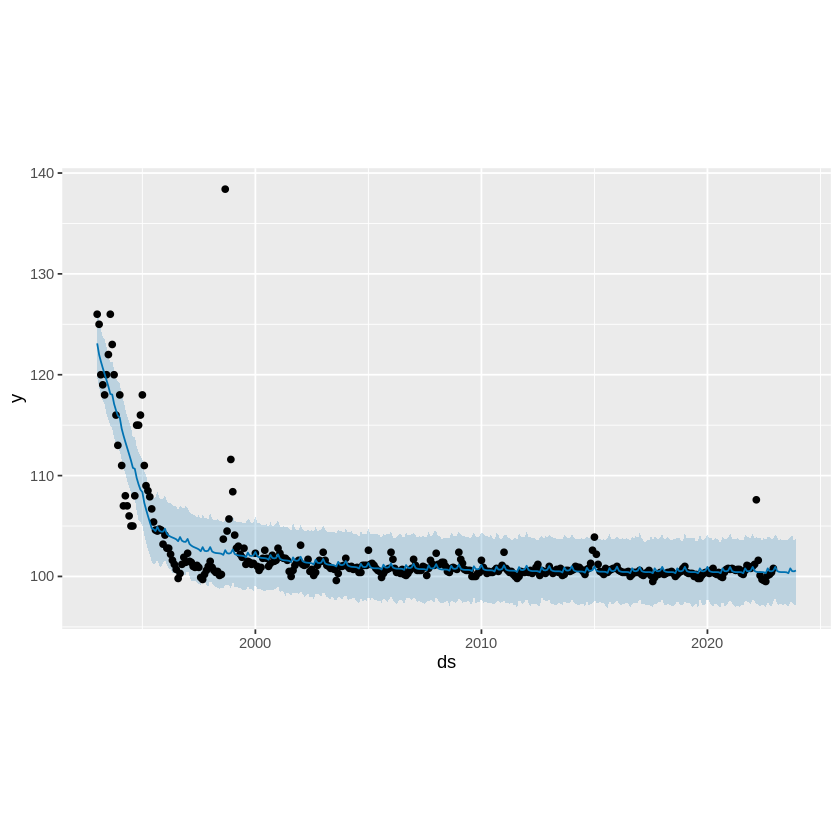

In [ ]:
plot(m, forecast)

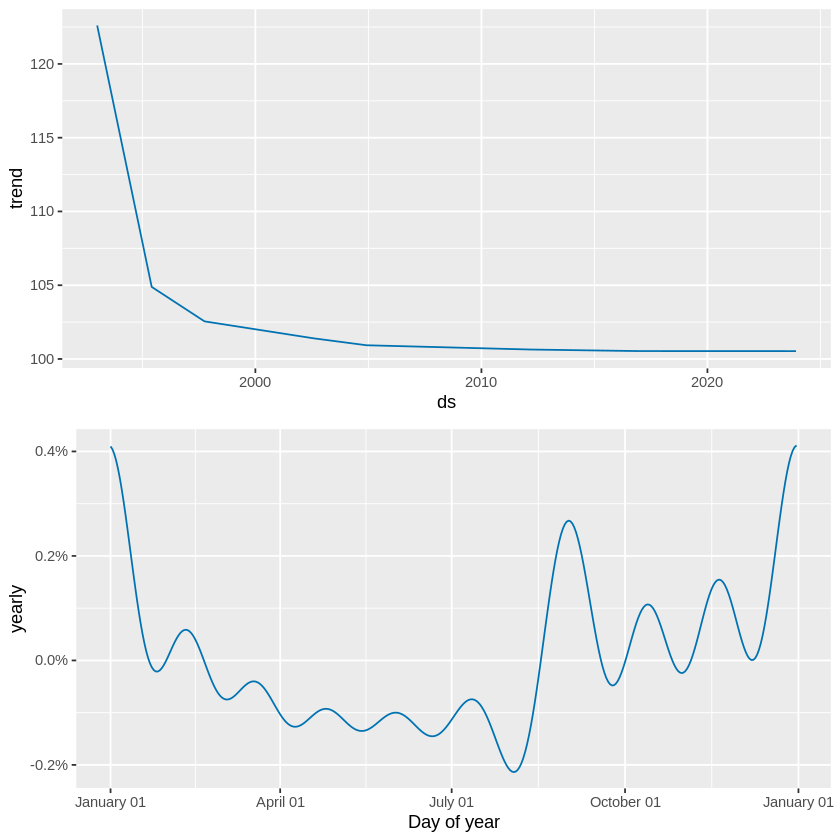

In [ ]:
prophet_plot_components(m, forecast)

##ETS

In [ ]:
ets = ets(cpi_learn)
pred_ets = predict(ets, h = 12)
pred_ets

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       100.5684 97.49380 103.6430 95.86619 105.2706
Feb 2023       100.5684 97.03065 104.1062 95.15787 105.9789
Mar 2023       100.5684 96.62141 104.5154 94.53199 106.6048
Apr 2023       100.5684 96.25072 104.8861 93.96507 107.1717
May 2023       100.5684 95.90937 105.2274 93.44303 107.6938
Jun 2023       100.5684 95.59132 105.5455 92.95661 108.1802
Jul 2023       100.5684 95.29236 105.8445 92.49939 108.6374
Aug 2023       100.5684 95.00940 106.1274 92.06664 109.0702
Sep 2023       100.5684 94.74011 106.3967 91.65480 109.4820
Oct 2023       100.5684 94.48268 106.6541 91.26110 109.8757
Nov 2023       100.5684 94.23567 106.9011 90.88331 110.2535
Dec 2023       100.5684 93.99788 107.1389 90.51966 110.6172

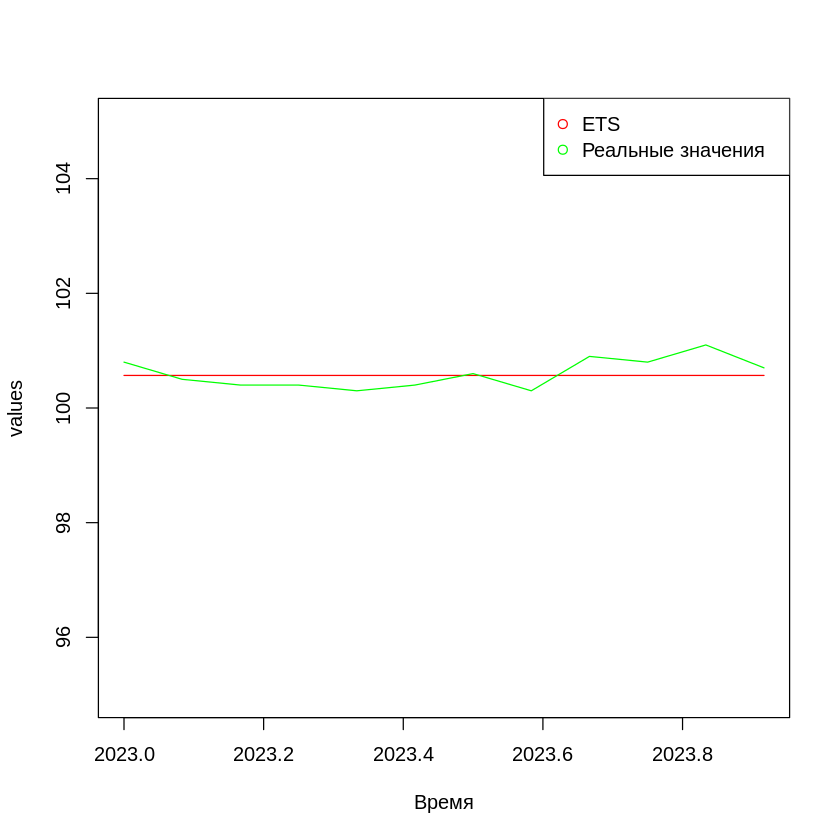

In [ ]:
plot(pred_ets$mean, col = "red", ylim = c(95, 105), xlab='Время', ylab='values')
lines(cpi_test,col = "green")
legend("topright",
       legend = c("ETS", "Реальные значения"),
       col=c('red', 'green'), pch=1)

In [ ]:
RMSE = c(rmse(cpi_test, pred_ets$mean))
MAE = c(mae(cpi_test, pred_ets$mean))
MAPE = c(mape(cpi_test, pred_ets$mean))
print(c(RMSE,MAE, MAPE))

[1] 0.2503294 0.2166667 0.0021521


##TBATS

##Вывод

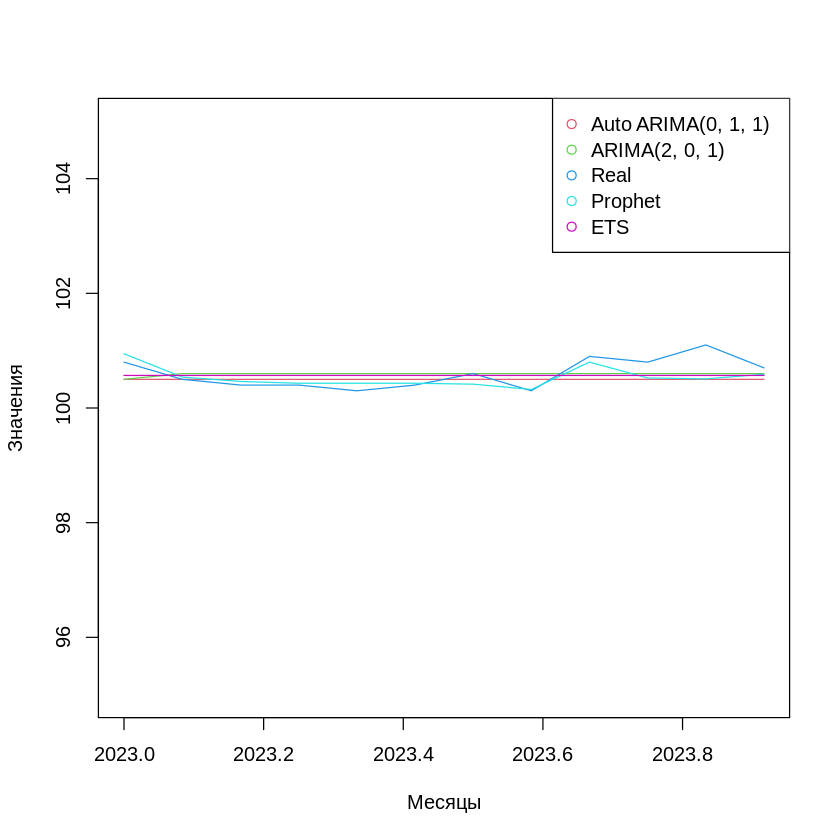

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(95, 105),
     xlab = "Месяцы",
     ylab = "Значения")
lines(pred_arima210,
      type = "l",
      col = 3)
lines(cpi_test,
      type = "l",
      col = 4)
lines(pred_prophet,
      type = "l",
      col = 5)
lines(pred_ets$mean,
      type = "l",
      col = 6)
legend("topright", legend = c("Auto ARIMA(0, 1, 1)", "ARIMA(2, 0, 1)","Real", "Prophet", "ETS"), col=c(2, 3, 4, 5, 6), pch=1)

#Индекс фондового рынка S&P500

##Временной ряд

In [ ]:
sp500 <- read.csv(file = "sp500.csv", sep = ",")
#sp500 <- sp500$Value
sp500

In [ ]:
sp500_df <- data.frame(ds = as.Date(sp500$Day), y = sp500$Value)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


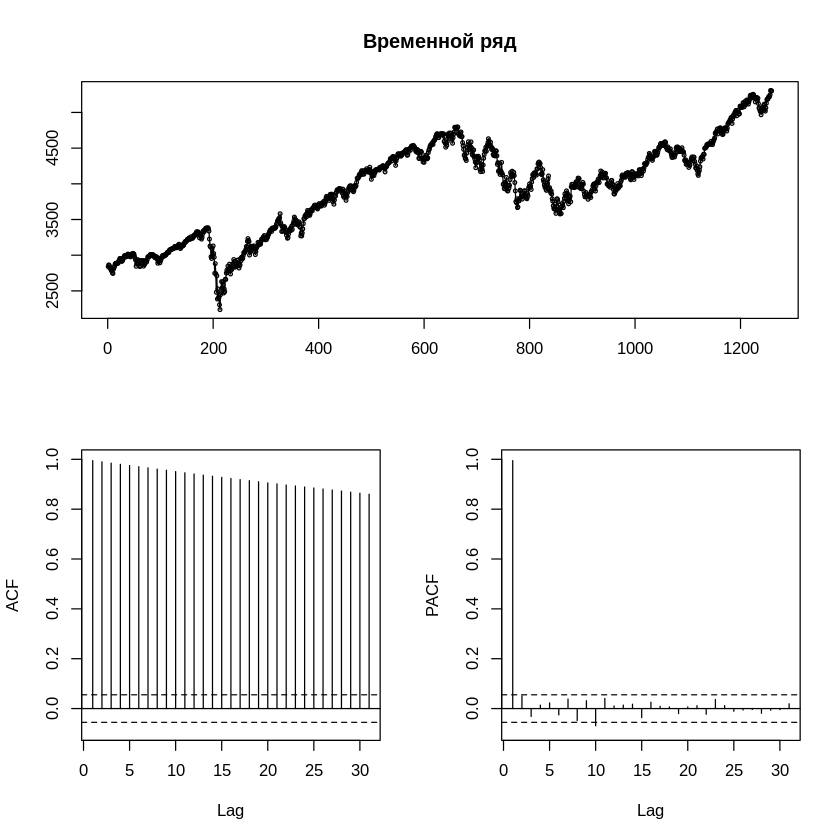

In [ ]:
tsdisplay(sp500, main = 'Временной ряд', ci.col = "black")

Явно видна сезонность и тренд, ряд не станционарный

In [ ]:
adf.test(sp500)


	Augmented Dickey-Fuller Test

data:  sp500
Dickey-Fuller = -2.0804, Lag order = 10, p-value = 0.5443
alternative hypothesis: stationary


In [ ]:
sp500_diff <- diff(sp500)

`p-value` > 0.05, не можем отвергнуть нулевую гипотезу - процесс нестанионарный.

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


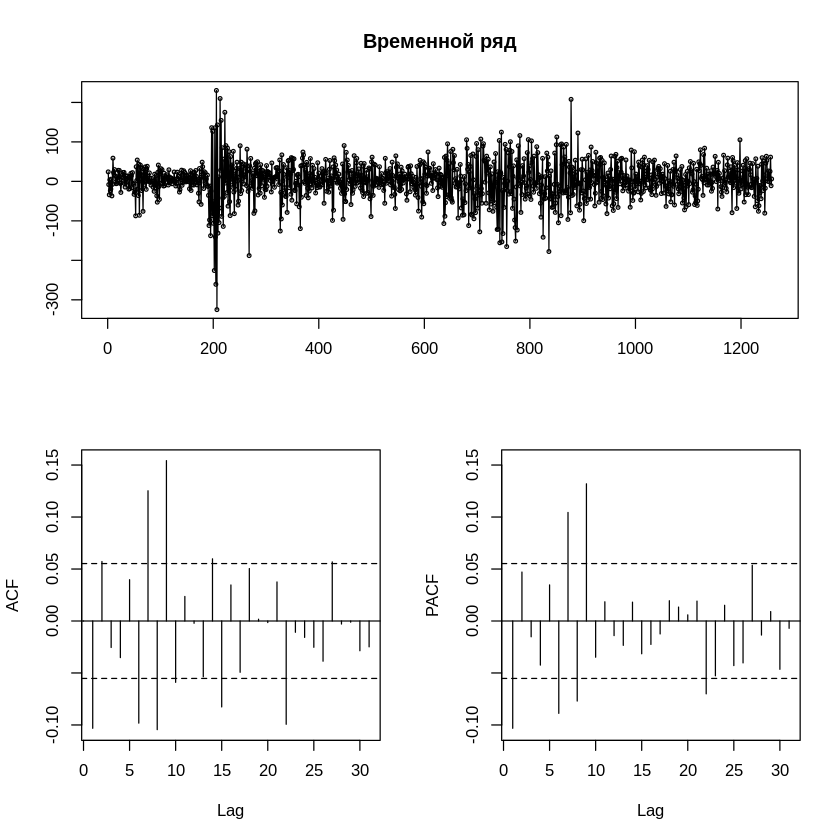

In [ ]:
tsdisplay(sp500_diff, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(sp500_diff)

Warning message in adf.test(sp500_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  sp500_diff
Dickey-Fuller = -9.9945, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


`p-value` < 0.05

ACF обрывается на втором лаге - q=2, PACF обрывается на первом лаге - p=1, d=1

In [ ]:
sp500_test = tail(sp500$Value, 365)
sp500_learn = head(sp500$Value, -365)

##ARIMA.auto

In [ ]:
model = auto.arima(sp500_learn, trace= TRUE, stationary = FALSE, approximation = FALSE, seasonal= TRUE)
summary(model)


 ARIMA(2,1,2) with drift         : 9473.398
 ARIMA(0,1,0) with drift         : 9530.052
 ARIMA(1,1,0) with drift         : 9515.904
 ARIMA(0,1,1) with drift         : 9518.038
 ARIMA(0,1,0)                    : 9528.718
 ARIMA(1,1,2) with drift         : 9515.222
 ARIMA(2,1,1) with drift         : 9515.599
 ARIMA(3,1,2) with drift         : Inf
 ARIMA(2,1,3) with drift         : Inf
 ARIMA(1,1,1) with drift         : 9514.91
 ARIMA(1,1,3) with drift         : 9516.437
 ARIMA(3,1,1) with drift         : 9517.122
 ARIMA(3,1,3) with drift         : Inf
 ARIMA(2,1,2)                    : 9472.186
 ARIMA(1,1,2)                    : 9513.96
 ARIMA(2,1,1)                    : 9514.345
 ARIMA(3,1,2)                    : Inf
 ARIMA(2,1,3)                    : Inf
 ARIMA(1,1,1)                    : 9513.727
 ARIMA(1,1,3)                    : 9515.251
 ARIMA(3,1,1)                    : Inf
 ARIMA(3,1,3)                    : Inf

 Best model: ARIMA(2,1,2)                    



Series: sp500_learn 
ARIMA(2,1,2) 

Coefficients:
          ar1      ar2     ma1     ma2
      -1.7595  -0.8857  1.6670  0.7684
s.e.   0.0375   0.0368  0.0517  0.0509

sigma^2 = 2350:  log likelihood = -4731.06
AIC=9472.12   AICc=9472.19   BIC=9496.09

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE     MASE       ACF1
Training set 1.463266 48.33831 34.42844 0.03205375 0.956663 0.989275 0.01519769

In [ ]:
preds = predict(model, n.ahead = length(sp500_test))

In [ ]:
pred_auto<-c(preds$pred)
pred_auto

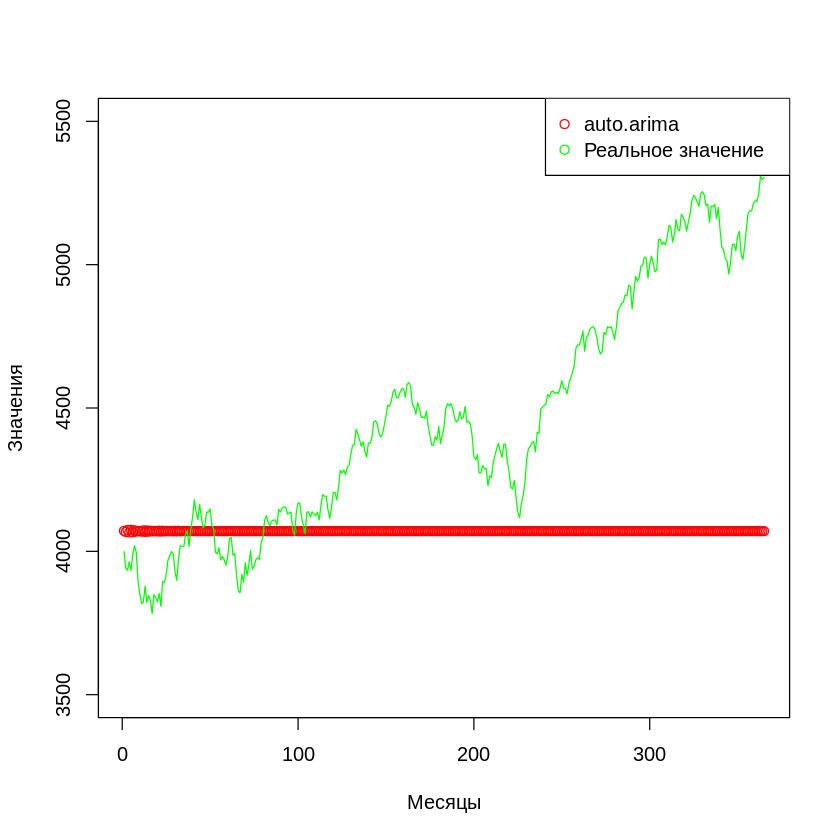

In [ ]:
plot(new_pred_auto, col = "red", ylim = c(3500, 5500),
     xlab = "Месяцы", ylab = "Значения")
lines(sp500_test, col = "green")
legend("topright", legend = c("auto.arima", "Реальное значение"),
       col=c("red", "green"), pch=1)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


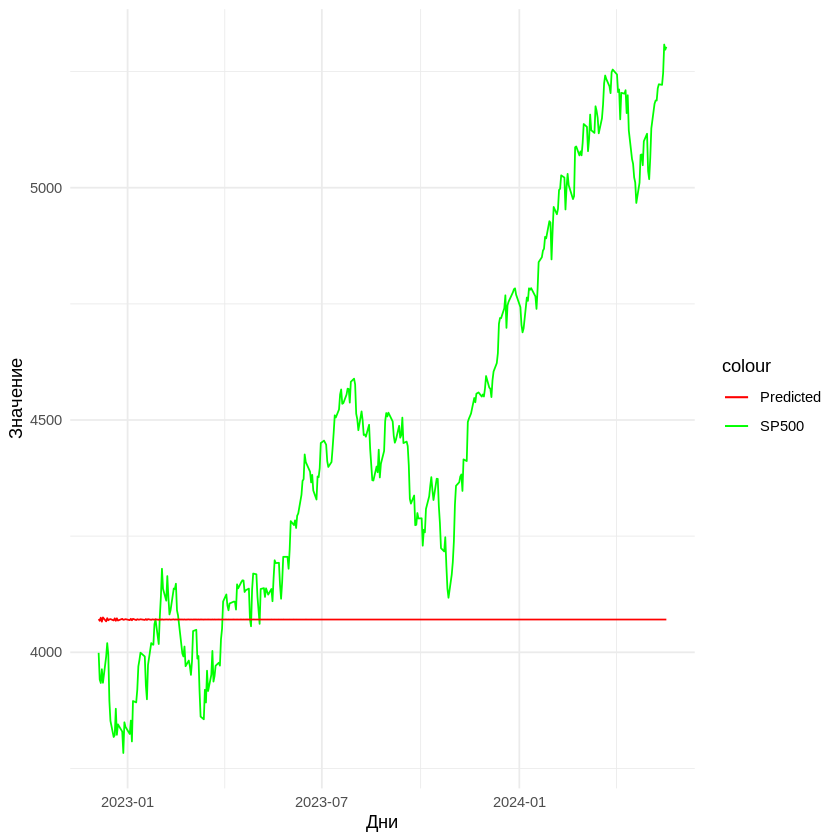

In [ ]:
data <- data.frame(Date = tail(sp500_df$ds, 365), SP500 = sp500_test, Predicted = pred_auto)
ggplot(data, aes(x = Date)) +
  geom_line(aes(y = SP500, color = "SP500"), linetype = "solid") +
  geom_line(aes(y = Predicted, color = "Predicted"), linetype = "solid") +
  labs(x = "Дни",
       y = "Значение") +
  scale_color_manual(values = c("SP500" = "green", "Predicted" = "red")) +
  theme_minimal()

In [ ]:
RMSE = c(rmse(sp500_test, pred_auto))
MAE = c(mae(sp500_test, pred_auto))
MAPE = c(mape(sp500_test, pred_auto))
print(c(RMSE,MAE, MAPE))

[1] 571.87983738 440.22950297   0.09241632


##Подбор по RMSE/MAE/AIC

In [ ]:
arimas <- createArimas(sp500_learn, sp500_test, 1, 1, 2)
bestModels <- rbind(
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,MAPE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
9,0,1,2,569.9727,438.5038,0.0920553,9512.55
91,0,1,2,569.9727,438.5038,0.0920553,9512.55


ARIMA(0, 1, 2) - наилучшая по RMSE

ARIMA(2, 1, 2) - модель, которую выдала auto.arima (RMSE - 571.87984)

In [ ]:
arima012 = arima(sp500_learn, c(0,1,2))

In [ ]:
preds <- predict(arima012, n.ahead=length(sp500_test))
pred_arima012 <- c(preds$pred)
pred_arima012

In [ ]:
RMSE = c(rmse(sp500_test, pred_arima012))
MAE = c(mae(sp500_test, pred_arima012))
MAPE = c(mape(sp500_test, pred_arima012))
print(c(RMSE,MAE, MAPE))

[1] 569.9727363 438.5037872   0.0920553


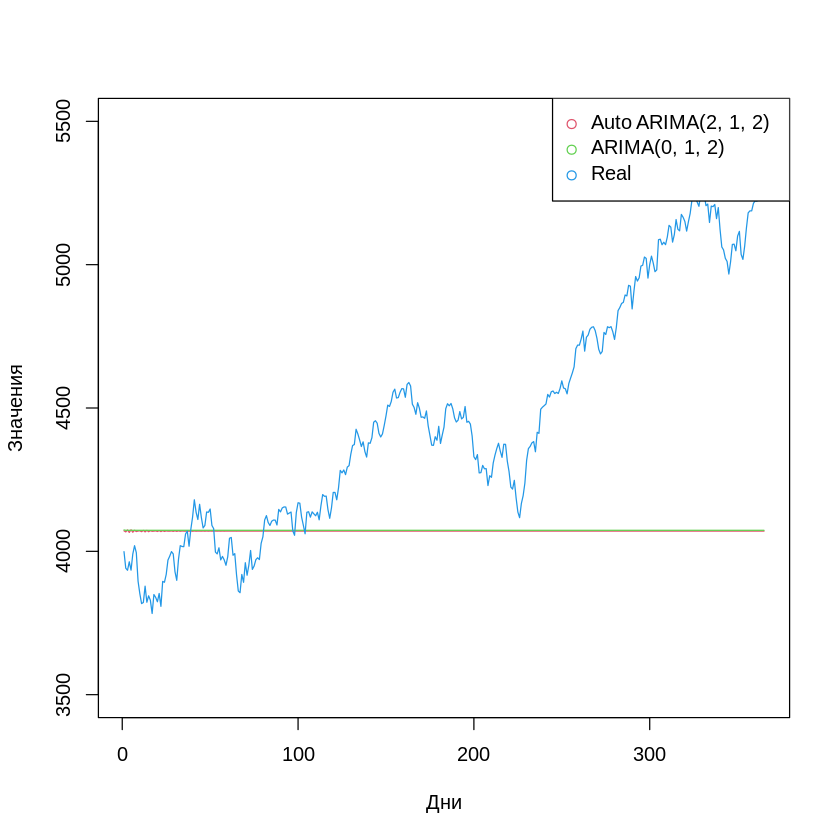

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(3500, 5500),
     xlab = "Дни",
     ylab = "Значения")
lines(pred_arima012,
      type = "l",
      col = 3)
lines(sp500_test,
      type = "l",
      col = 4)
legend("topright", legend = c("Auto ARIMA(2, 1, 2)", "ARIMA(0, 1, 2)","Real"), col=c(2, 3, 4), pch=1)

Результат сильно не улучшился на графике, но по метрикам ARIMA(0, 1, 2) лучше, чем auto.arima - ARIMA(2, 1, 2)

##Prophet - best_model from python

In [ ]:
sp500_df

In [ ]:
train_df = tail(sp500_df, -365)
test_df = tail(sp500_df, 365)

In [ ]:
test_df

In [ ]:
m <- prophet(train_df, changepoint.prior.scale = 0.00005,
                   seasonality.prior.scale = 0.00005,
                   n.changepoints = 0,
                   seasonality.mode = 'multiplicative',
                   holidays.prior.scale = 0.0001,
                   daily.seasonality=TRUE)

Warning message in .local(object, ...):
“non-zero return code in optimizing”
Optimization terminated abnormally. Falling back to Newton optimizer.



In [ ]:
future <- make_future_dataframe(m, periods = length(test_df$ds), freq = 'day')
forecast <- predict(m, future)
forecast_df <- data.frame(ds = as.Date(forecast$ds), yhat = forecast$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
pred_prophet <- c(forecast_df$yhat)
actual <- test_df$y
RMSE <- rmse(sp500_test, pred_prophet)
MAE <- mae(sp500_test, pred_prophet)
MAPE <- mape(sp500_test, pred_prophet)

metrics <- c(RMSE = RMSE, MAE = MAE, MAPE = MAPE)
print(metrics)

        RMSE          MAE         MAPE 
457.00401947 404.08188236   0.09475629 


In [ ]:
future <- make_future_dataframe(m, periods = length(test_df$ds), freq = 'day')
forecast <- predict(m, future)

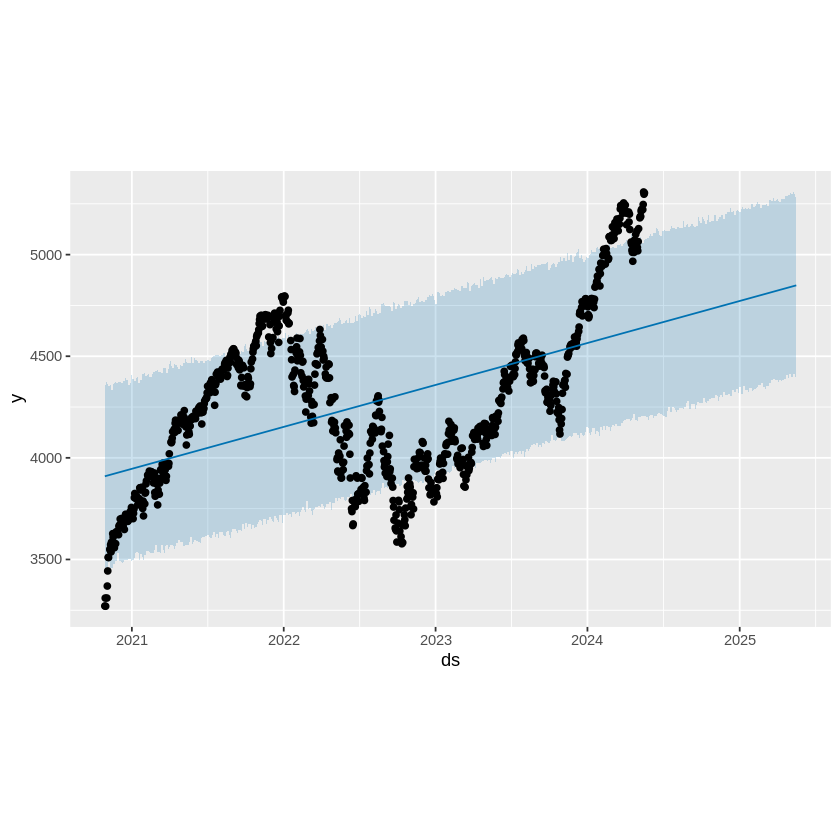

In [ ]:
plot(m, forecast)

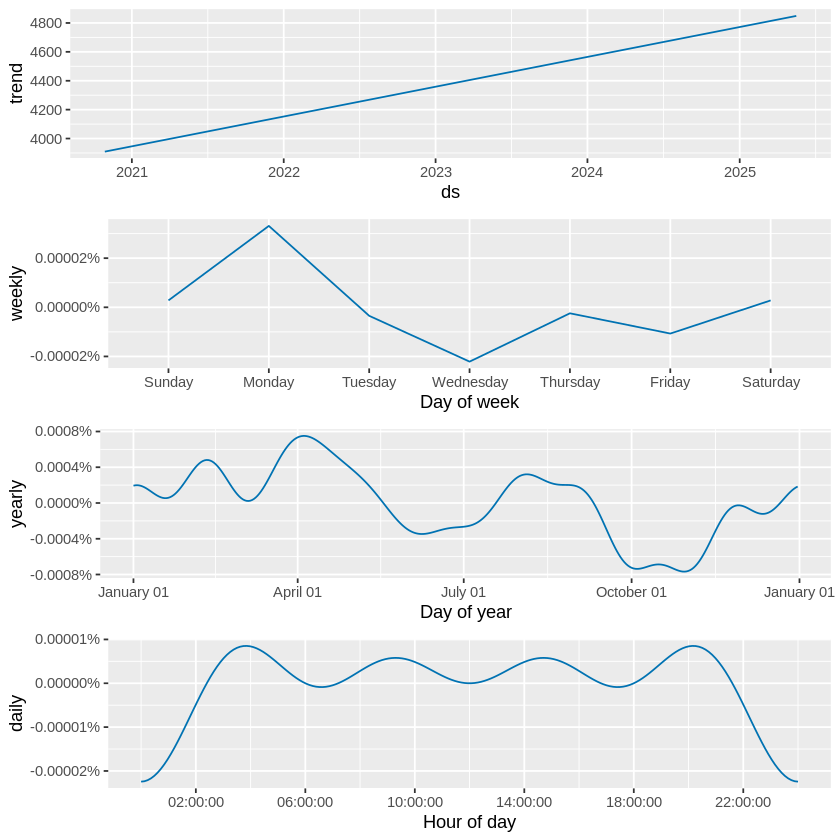

In [ ]:
prophet_plot_components(m, forecast)

##ETS

In [ ]:
ets = ets(sp500_learn)
pred_ets = predict(ets, h = 365)
pred_ets <- c(pred_ets$mean)

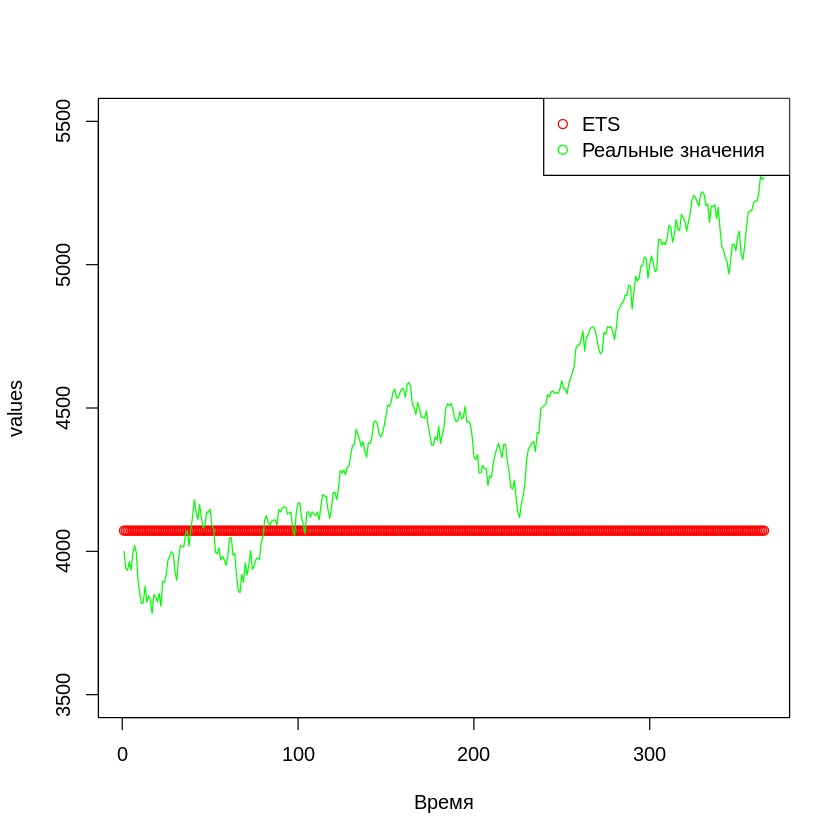

In [ ]:
plot(pred_ets, col = "red", ylim = c(3500, 5500), xlab='Время', ylab='values')
lines(sp500_test,col = "green")
legend("topright",
       legend = c("ETS", "Реальные значения"),
       col=c('red', 'green'), pch=1)

In [ ]:
RMSE = c(rmse(sp500_test, pred_ets))
MAE = c(mae(sp500_test, pred_ets))
MAPE = c(mape(sp500_test, pred_ets))
print(c(RMSE,MAE, MAPE))

[1] 570.76973429 439.22241269   0.09220548


##Вывод

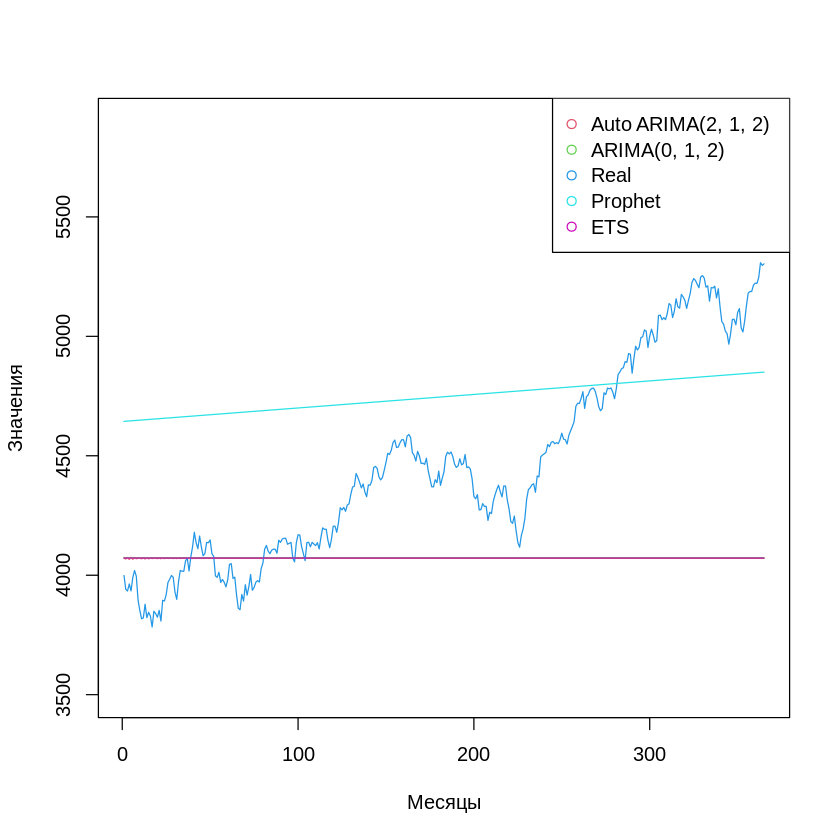

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(3500, 5900),
     xlab = "Месяцы",
     ylab = "Значения")
lines(pred_arima012,
      type = "l",
      col = 3)
lines(sp500_test,
      type = "l",
      col = 4)
lines(pred_prophet,
      type = "l",
      col = 5)
lines(pred_ets,
      type = "l",
      col = 6)
legend("topright", legend = c("Auto ARIMA(2, 1, 2)", "ARIMA(0, 1, 2)","Real", "Prophet", "ETS"), col=c(2, 3, 4, 5, 6), pch=1)

#Официальный курс доллара

##Временной ряд

In [ ]:
finmar <- sophisthse("FINMAR_M")

In [ ]:
finmar <- window(finmar, start = c(1993, 1), end = c(2023, 12))

In [ ]:
finmar

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1993,0.57,0.59,0.68,0.82,0.99,1.06,0.99,0.99,1.20,1.19,1.21,1.25
1994,1.54,1.66,1.75,1.82,1.90,1.99,2.05,2.15,2.60,3.06,3.23,3.55
1995,4.00,4.41,4.90,5.10,5.00,4.54,4.42,4.44,4.51,4.50,4.58,4.64
1996,4.73,4.82,4.85,4.93,5.01,5.11,5.19,5.35,5.40,5.46,5.51,5.56
1997,5.63,5.68,5.73,5.76,5.77,5.78,5.80,5.83,5.86,5.89,5.92,5.96
1998,6.03,6.07,6.11,6.13,6.16,6.20,6.24,7.91,16.07,16.01,17.88,20.65
1999,22.60,22.86,24.18,24.23,24.44,24.22,24.19,24.75,25.08,26.05,26.42,27.00
2000,28.55,28.66,28.46,28.40,28.25,28.07,27.80,27.75,27.75,27.83,27.85,28.16
2001,28.37,28.72,28.76,28.86,29.09,29.11,29.27,29.37,29.40,29.70,29.90,30.14
2002,30.69,30.93,31.07,31.20,31.31,31.44,31.44,31.57,31.64,31.74,31.84,31.78


Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


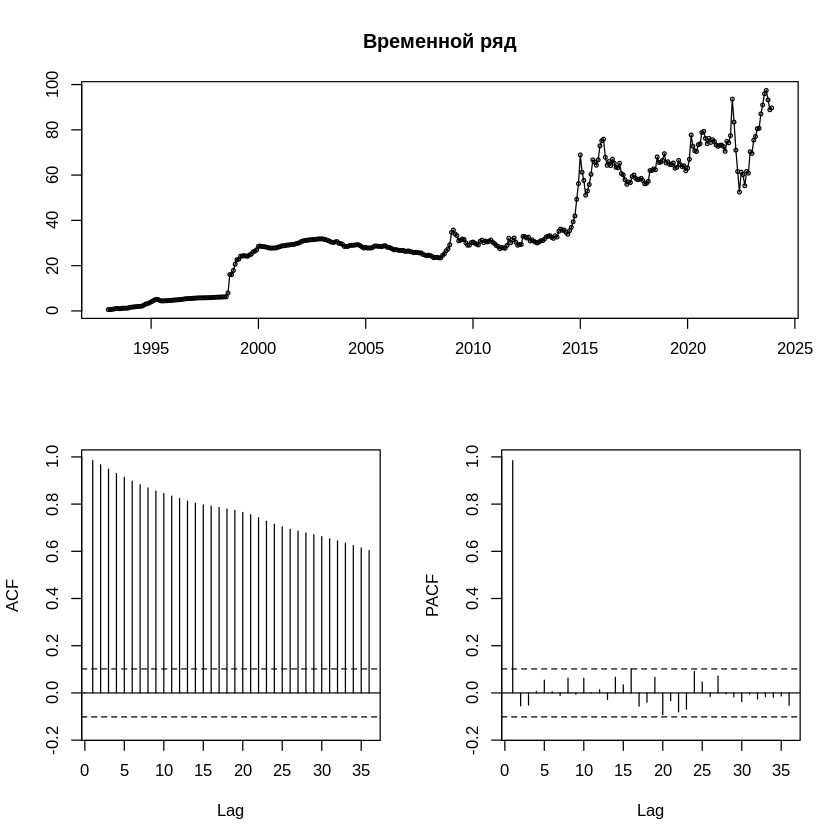

In [ ]:
tsdisplay(finmar, main = 'Временной ряд', ci.col = "black")

Автокорелляция снижается слишком медленно, нет нулевых коэффициентов. Ряд не станционарный, наблюдается некоторая сезонность в частных автокорреляциях.

In [ ]:
adf.test(finmar)


	Augmented Dickey-Fuller Test

data:  finmar
Dickey-Fuller = -2.1578, Lag order = 7, p-value = 0.5104
alternative hypothesis: stationary


`p-value` > 0.05, не можем отвергнуть нулевую гипотезу - процесс нестанионарный.

In [ ]:
finmar_2diff <- diff(diff(finmar))

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


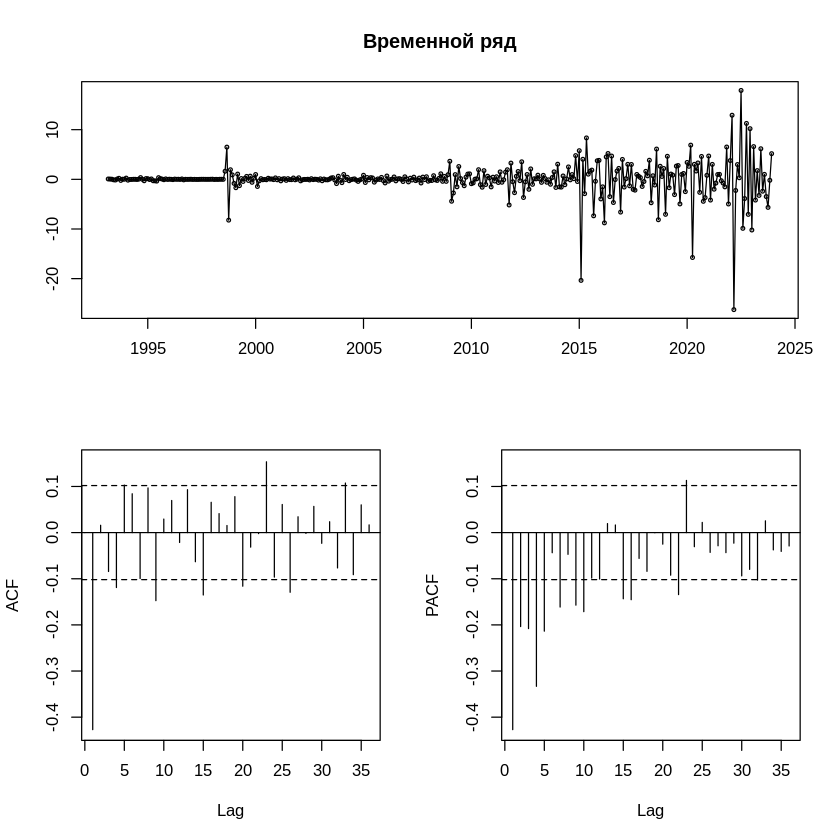

In [ ]:
tsdisplay(finmar_2diff, main = 'Временной ряд', ci.col = "black")

Автокорреляция быстро снижается, PACF снижается медленнее. ARMA(9, 12), d=2

In [ ]:
adf.test(finmar_2diff)

Warning message in adf.test(finmar_2diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  finmar_2diff
Dickey-Fuller = -10.671, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


`p-value` < 0.05

##ARIMA.auto

In [ ]:
finmar_test = tail(finmar, 12)
finmar_learn = head(finmar, -12)

In [ ]:
finmar_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,69.59,75.43,77.09,80.51,80.69,87.03,90.98,95.93,97.41,93.24,88.88,89.69


In [ ]:
model = auto.arima(finmar_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(model)


 ARIMA(0,1,0)                               : 1667.371
 ARIMA(0,1,0)            with drift         : 1667.147
 ARIMA(0,1,0)(0,0,1)[12]                    : 1666.365
 ARIMA(0,1,0)(0,0,1)[12] with drift         : 1666.638
 ARIMA(0,1,0)(0,0,2)[12]                    : 1667.321
 ARIMA(0,1,0)(0,0,2)[12] with drift         : 1667.25
 ARIMA(0,1,0)(1,0,0)[12]                    : 1666.819
 ARIMA(0,1,0)(1,0,0)[12] with drift         : 1667.067
 ARIMA(0,1,0)(1,0,1)[12]                    : 1667.619
 ARIMA(0,1,0)(1,0,1)[12] with drift         : 1667.78
 ARIMA(0,1,0)(1,0,2)[12]                    : 1669.273
 ARIMA(0,1,0)(1,0,2)[12] with drift         : 1669.07
 ARIMA(0,1,0)(2,0,0)[12]                    : 1667.448
 ARIMA(0,1,0)(2,0,0)[12] with drift         : 1667.369
 ARIMA(0,1,0)(2,0,1)[12]                    : 1669.424
 ARIMA(0,1,0)(2,0,1)[12] with drift         : 1669.113
 ARIMA(0,1,0)(2,0,2)[12]                    : 1671.317
 ARIMA(0,1,0)(2,0,2)[12] with drift         : 1671.137
 ARIMA(0,1,1

Series: finmar_learn 
ARIMA(0,1,4) with drift 

Coefficients:
         ma1    ma2      ma3      ma4   drift
      0.1223  0.011  -0.1341  -0.2281  0.1891
s.e.  0.0512  0.051   0.0496   0.0495  0.0963

sigma^2 = 5.636:  log likelihood = -817.39
AIC=1646.78   AICc=1647.02   BIC=1670.08

Training set error measures:
                        ME     RMSE      MAE        MPE    MAPE     MASE
Training set -0.0004724819 2.354088 1.200401 -0.7813951 3.66559 0.261963
                     ACF1
Training set -0.003936897

Наилучшая модель: ARIMA(0,1,4)

In [ ]:
arima014 = arima(finmar_learn, c(0,1,4))

In [ ]:
preds = predict(arima014, n.ahead = length(finmar_test))

In [ ]:
pred_auto<-round(preds$pred,2)
pred_auto

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,71.90,70.72,69.96,68.30,68.30,68.30,68.30,68.30,68.30,68.30,68.30,68.30


In [ ]:
finmar_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,69.59,75.43,77.09,80.51,80.69,87.03,90.98,95.93,97.41,93.24,88.88,89.69


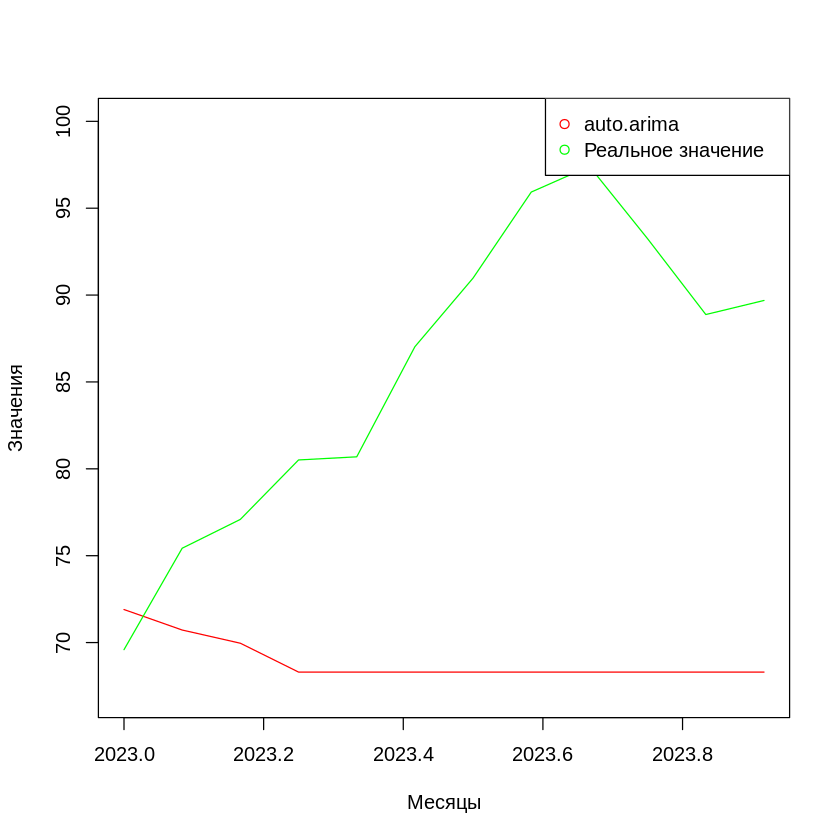

In [ ]:
plot(pred_auto, col = "red", ylim = c(67, 100),
     xlab = "Месяцы", ylab = "Значения")
lines(finmar_test, col = "green")
legend("topright", legend = c("auto.arima", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
RMSE = c(rmse(finmar_test, pred_auto))
MAE = c(mae(finmar_test, pred_auto))
print(c(RMSE,MAE))

[1] 19.06137 16.98417


##Подбор по RMSE/MAE/AIC

In [ ]:
arimas <- createArimas(finmar_learn, finmar_test, 9, 2, 12)
bestModels <- rbind(
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
266,7,2,0,6.388095,5.679522,1697.219
257,6,2,0,7.668549,4.866596,1706.415


ARIMA(7, 2, 0) - наилучшая модель по RMSE

ARIMA(0, 1, 4) - модель ARIMA.auto (RMSE - 19.06137)

In [ ]:
arima720 = arima(finmar_learn, c(7,2,0))

In [ ]:
preds <- predict(arima720, n.ahead=length(finmar_test))
pred_arima720 <- round(preds$pred,2)
pred_arima720

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,73.10,71.01,73.64,74.71,76.63,81.03,81.79,84.65,86.97,88.06,90.73,92.65


In [ ]:
finmar_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,69.59,75.43,77.09,80.51,80.69,87.03,90.98,95.93,97.41,93.24,88.88,89.69


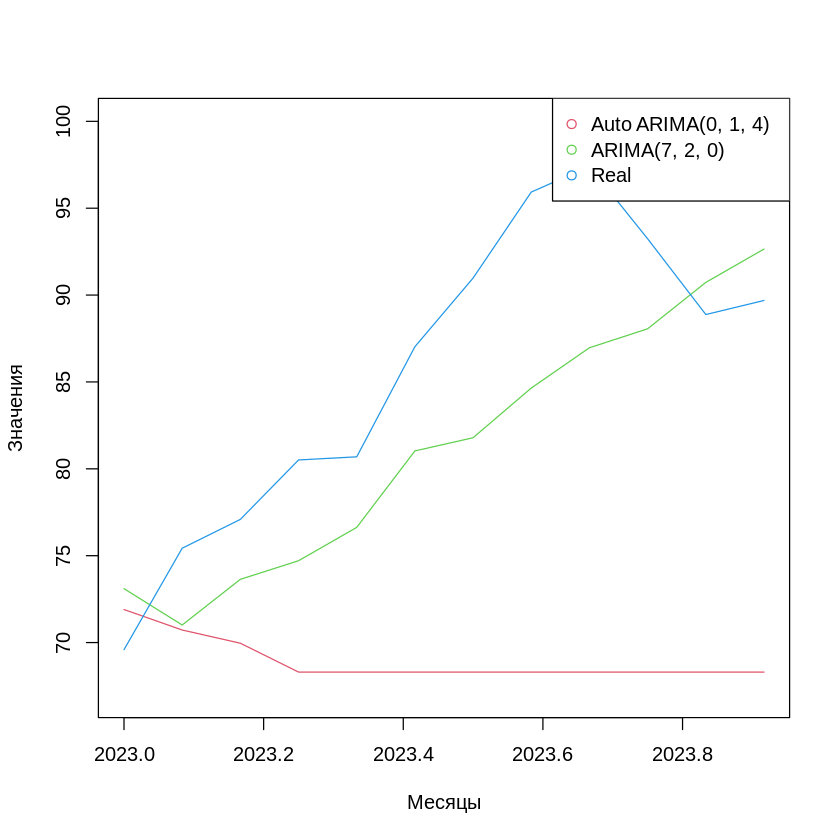

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(67, 100),
     xlab = "Месяцы",
     ylab = "Значения")
lines(pred_arima720,
      type = "l",
      col = 3)
lines(finmar_test,
      type = "l",
      col = 4)
legend("topright", legend = c("Auto ARIMA(0, 1, 4)", "ARIMA(7, 2, 0)","Real"), col=c(2, 3, 4), pch=1)

Вывод: ARIMA(7, 2, 0) лучше, чем ARIMA(0, 1, 4)

##Prophet

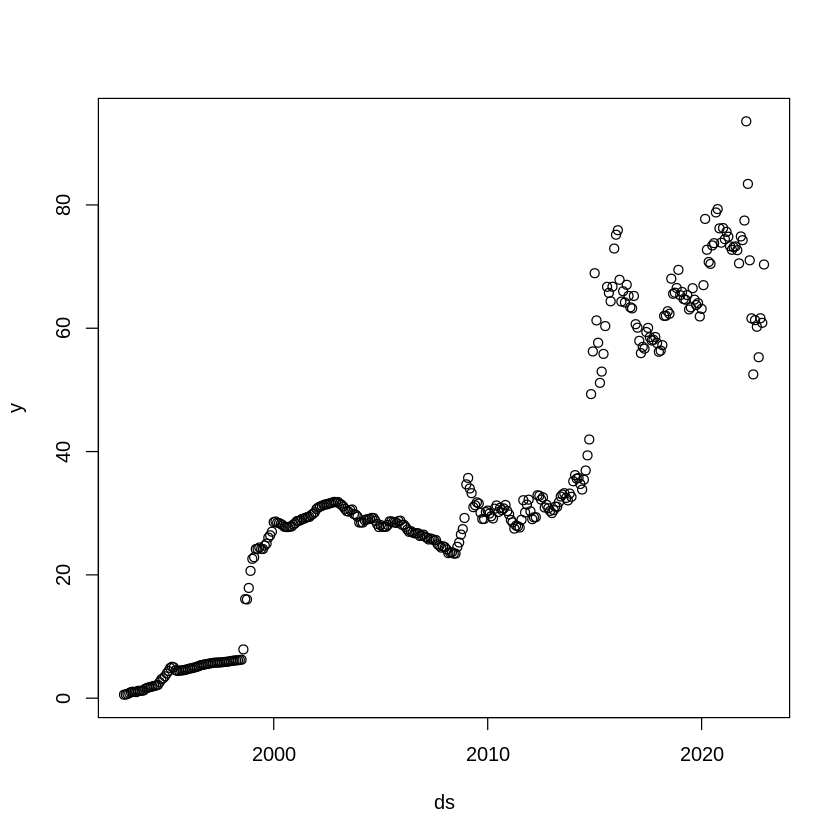

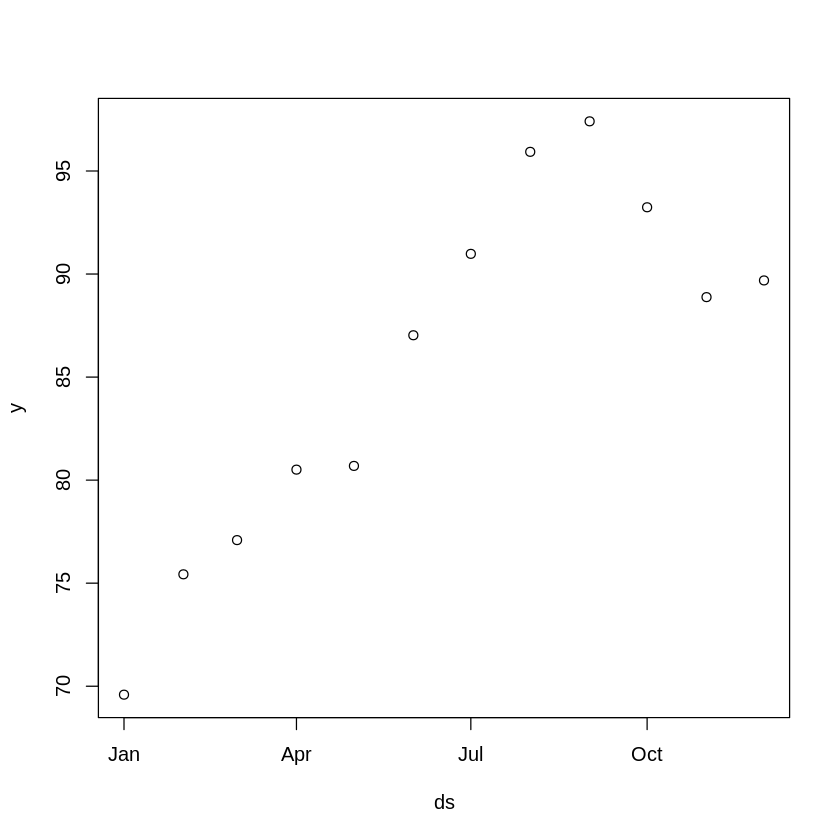

In [ ]:
ts_data <- ts(finmar, start = c(1993, 1), end = c(2023, 12), frequency = 12)

train_data <- window(ts_data, start = c(1993, 1), end = c(2022, 12))
test_data <- window(ts_data, start = c(2023, 1), end = c(2023, 12))

df <- data.frame(ds = as.Date(time(ts_data), format = "%Y-%m-%d"),
                 y = as.numeric(ts_data))

train_df <- data.frame(ds = as.Date(time(train_data), format = "%Y-%m-%d"),
                 y = as.numeric(train_data))
test_df <- data.frame(ds = as.Date(time(test_data), format = "%Y-%m-%d"),
                 y = as.numeric(test_data))

plot(train_df)
plot(test_df)

###Base

In [ ]:
require(prophet)
base_prophet <- prophet(df=train_df)

future <- make_future_dataframe(base_prophet, periods = length(test_df$ds), freq = 'month')
forecast_base <- predict(base_prophet, future)

Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



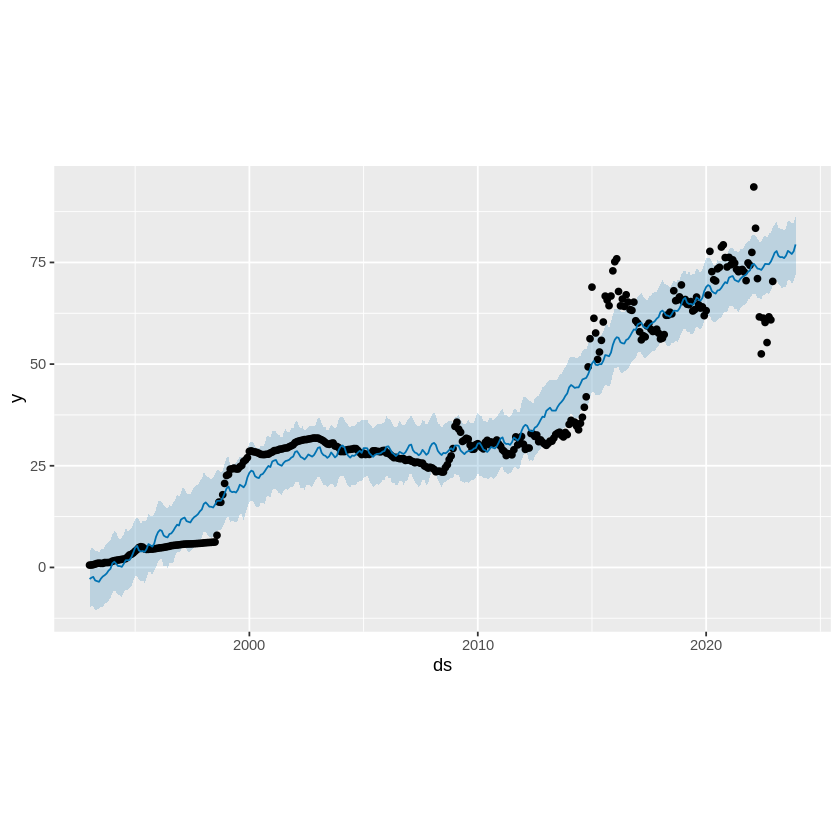

In [ ]:
plot(base_prophet, forecast_base)

In [ ]:
forecast_df <- data.frame(ds = as.Date(forecast_base$ds), yhat = forecast_base$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
head(forecast_df)

,ds,yhat
,<date>,<dbl>
361,2023-01-01,77.38949
362,2023-02-01,77.79760
363,2023-03-01,76.64189
364,2023-04-01,76.28349
365,2023-05-01,76.32763
366,2023-06-01,76.06141


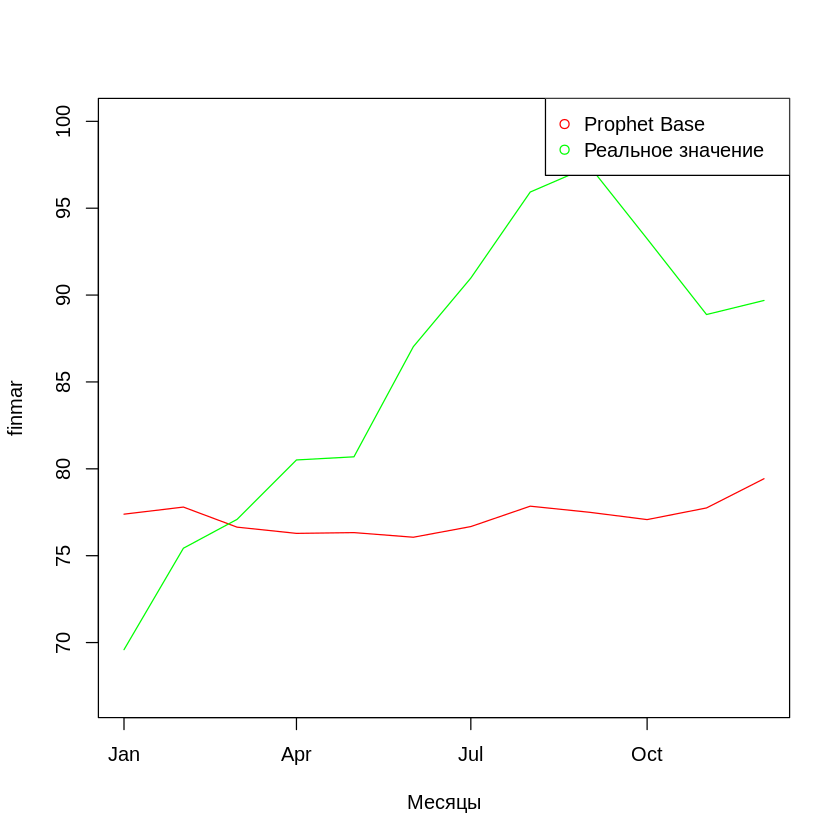

In [ ]:
plot(forecast_df, type="l", col = "red", ylim = c(67, 100),
     xlab = "Месяцы", ylab = "finmar")
lines(test_df, col = "green")
legend("topright", legend = c("Prophet Base", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
RMSE = c(rmse(test_df$y, forecast_df$yhat))
MAE = c(mae(test_df$y, forecast_df$yhat))
print(c(RMSE,MAE))

[1] 11.69889 10.00225


###GridSearch

In [ ]:
param_grid <- expand.grid(changepoint_prior_scale = c(0.0005, 0.001, 0.01, 0.05),
                          seasonality_prior_scale = c(0.005, 0.01, 0.1, 1.0),
                          n_changepoints = c(1, 3, 5, 7, 10),
                          seasonality_mode = c('multiplicative','additive'))

results <- list()
model_parameters <- data.frame(RMSE = numeric(), MAE = numeric(),
                              changepoint_prior_scale = numeric(),
                              seasonality_prior_scale = numeric())

for (i in 1:nrow(param_grid)) {
  params <- param_grid[i, ]
  model <- train_prophet_model(train_df, params)
  metrics <- calculate_metrics(model, test_df)

  new_row <- data.frame(RMSE = metrics$RMSE, MAE = metrics$MAE,
                        changepoint_prior_scale = params$changepoint_prior_scale,
                        seasonality_prior_scale = params$seasonality_prior_scale,
                        n_changepoints = params$n_changepoints,
                        seasonality_mode = params$seasonality_mode)
  model_parameters <- rbind(model_parameters, new_row)

  results[[i]] <- list(params = params, model = model, metrics = metrics)
}
best_model <- results[[which.min(sapply(results, function(x) x$metrics$RMSE))]]

In [ ]:
best_model$metrics

$RMSE
[1] 10.13463

$MAE
[1] 8.62592

In [ ]:
model_parameters

RMSE,MAE,changepoint_prior_scale,seasonality_prior_scale,n_changepoints,seasonality_mode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.19750,15.244051,5e-04,0.005,1,multiplicative
17.22355,15.268511,1e-03,0.005,1,multiplicative
17.20818,15.254052,1e-02,0.005,1,multiplicative
12.67930,10.836826,5e-02,0.005,1,multiplicative
17.25280,15.290119,5e-04,0.010,1,multiplicative
17.33601,15.368373,1e-03,0.010,1,multiplicative
17.28700,15.322484,1e-02,0.010,1,multiplicative
12.75991,10.879157,5e-02,0.010,1,multiplicative
17.35912,15.390947,5e-04,0.100,1,multiplicative


In [ ]:
future <- make_future_dataframe(best_model$model, periods = length(test_df$ds), freq = 'month')
forecast_gridsearch <- predict(best_model$model, future)

In [ ]:
forecast_df <- data.frame(ds = as.Date(forecast_gridsearch$ds), yhat = forecast_gridsearch$yhat)
forecast_df = tail(forecast_df, -length(train_df$ds))
head(forecast_df)

,ds,yhat
,<date>,<dbl>
361,2023-01-01,77.91272
362,2023-02-01,78.46629
363,2023-03-01,78.39767
364,2023-04-01,78.11832
365,2023-05-01,78.20653
366,2023-06-01,78.24935


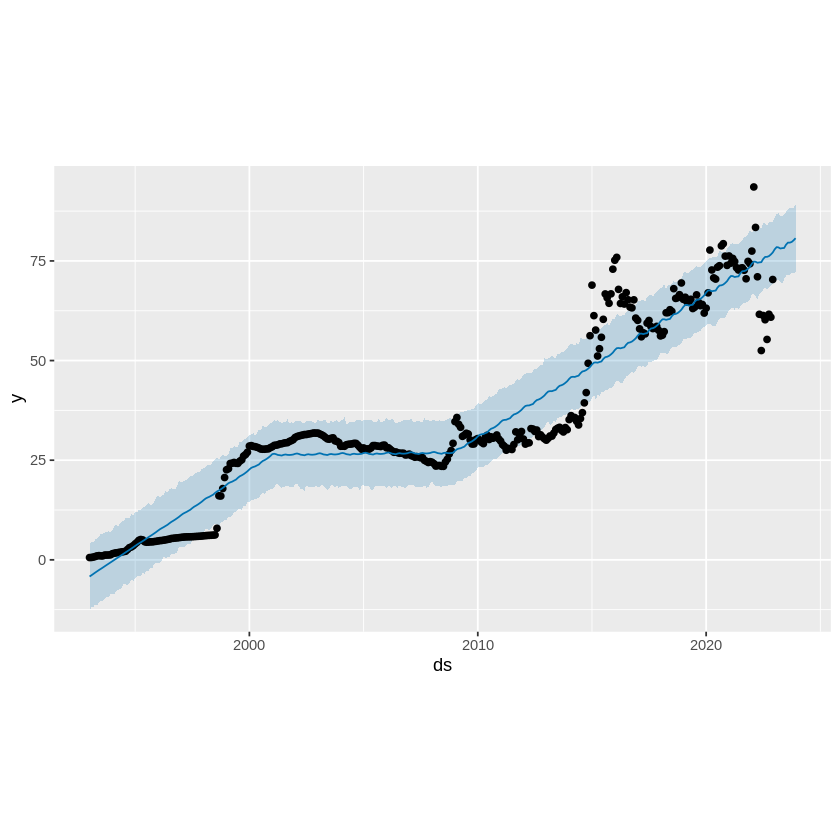

In [ ]:
plot(best_model$model, forecast_gridsearch)

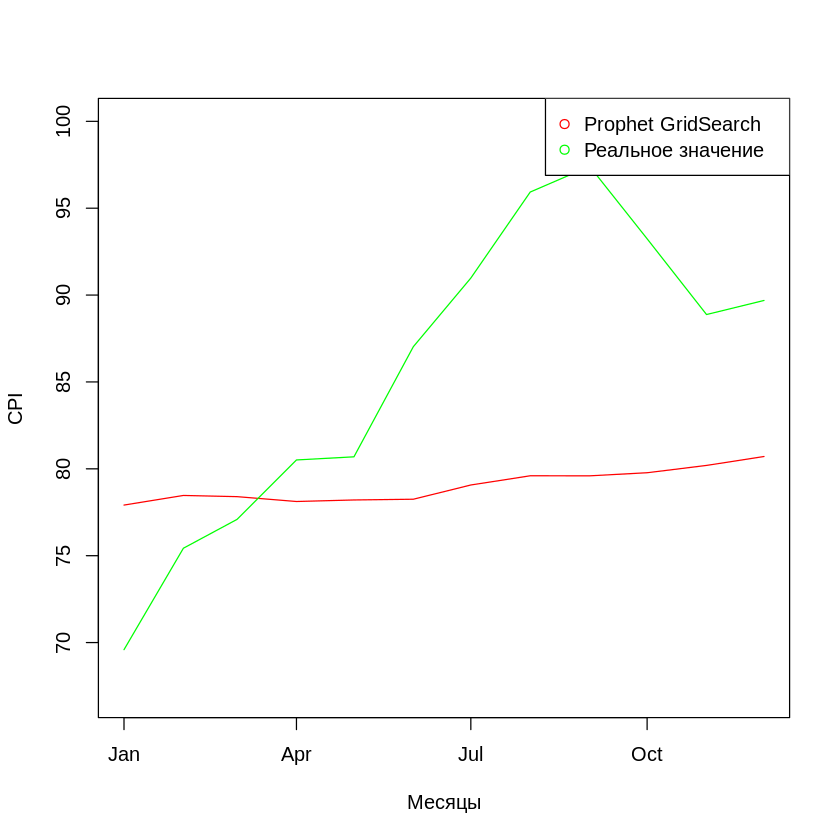

In [ ]:
plot(forecast_df, type="l", col = "red", ylim = c(67, 100),
     xlab = "Месяцы", ylab = "CPI")
lines(test_df, col = "green")
legend("topright", legend = c("Prophet GridSearch", "Реальное значение"),
       col=c("red", "green"), pch=1)

In [ ]:
RMSE = c(rmse(test_df$y, forecast_df$yhat))
MAE = c(mae(test_df$y, forecast_df$yhat))
print(c(RMSE,MAE))

[1] 10.13463  8.62592


##Вывод

In [ ]:
plot(pred_auto,
     type = "l",
     col = 2,
     ylim = c(95, 105),
     xlab = "Месяцы",
     ylab = "Значения")
lines(pred_arima210,
      type = "l",
      col = 3)
lines(cpi_test,
      type = "l",
      col = 4)
lines(pred_prophet,
      type = "l",
      col = 5)
legend("topright", legend = c("Auto ARIMA(0, 1, 1)", "ARIMA(2, 0, 1)","Real", "Prophet GridSearch"), col=c(2, 3, 4, 5), pch=1)